# <p style="padding:10px;background-color:#432C0A;margin:0;color:#c69c6c;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Google paly Dataset</p>

<p style="text-align:center; ">
<img src="https://lh3.googleusercontent.com/k-2BsI5KgLC2JxQd2rFA-3RHg8-tvoXjinZFNvZLnGlbcxR8xkVM9GW3tqBK5xbTSJKr3-Ei2SVuDoAuYaR3-AL5DVlV5vNj10d6x-604UYNa0sfGEU=s0">
</p>

The following project is about the analysis of a dataset contaning data about google play store in order to find interesting insights and predict the app rating based on some app features.

The project can be divided in the following sections:<br>
* Dataset cleaning + Feature Engineering<br>
* Exploratory Data Analysis: answering interesting questions about the data<br>
* Data preparation for ML (encoding, scaling) for Rating prediction<br>
* ML modeling<br>
* Results<br>

<a id="1"></a>
# <p style="padding:10px;background-color:#432C0A;margin:0;color:#c69c6c;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Importing Libraries</p>

In [559]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from xgboost import XGBRegressor

warnings.filterwarnings('ignore')

<a id="2"></a>
# <p style="padding:10px;background-color:#432C0A;margin:0;color:#c69c6c;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">About Dataset</p>

The following project is about the analysis of a dataset contaning data about google play store in order to find interesting insights and predict the app rating based on some app features.

The project can be divided in the following sections:<br>
* Dataset cleaning + Feature Engineering<br>
* Exploratory Data Analysis: answering interesting questions about the data<br>
* Data preparation for ML (encoding, scaling) for Rating prediction<br>
* ML modeling<br>
* Results<br>

In [560]:
apps = pd.read_csv('googleplaystore.csv')

In [561]:
apps.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [562]:
apps.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 10841 entries, 0 to 10840

Data columns (total 13 columns):

 #   Column          Non-Null Count  Dtype  

---  ------          --------------  -----  

 0   App             10841 non-null  object 

 1   Category        10841 non-null  object 

 2   Rating          9367 non-null   float64

 3   Reviews         10841 non-null  object 

 4   Size            10841 non-null  object 

 5   Installs        10841 non-null  object 

 6   Type            10840 non-null  object 

 7   Price           10841 non-null  object 

 8   Content Rating  10840 non-null  object 

 9   Genres          10841 non-null  object 

 10  Last Updated    10841 non-null  object 

 11  Current Ver     10833 non-null  object 

 12  Android Ver     10838 non-null  object 

dtypes: float64(1), object(12)

memory usage: 1.1+ MB


In [563]:
apps.shape

(10841, 13)

In [564]:
apps.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

* We can already notice that some columns that should be 'Numerical' are labeled as objects (strings).
We will work on this and convert these columns into numerical.



<a id="2"></a>
# <p style="padding:10px;background-color:#432C0A;margin:0;color:#c69c6c;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500"> Numerical Features Cleaning and Analysis</p>

* In this section, some basic cleaning will be performed, then every feature will be analyzed.

* Moreover, we will define a custom function to get boxplot and histogram for numerical features.

In [565]:
def num_plots(apps, col, title, xlabel):
    fig, ax = plt.subplots(2, 1, sharex=True, figsize=(20,15),gridspec_kw={"height_ratios": (.2, .8)})
    ax[0].set_title(title,fontsize=18)
    sns.boxplot(x=col, data=apps, ax=ax[0])
    ax[0].set(yticks=[])
    sns.histplot(x=col, data=apps, ax=ax[1])
    ax[1].set_xlabel(xlabel, fontsize=16)
    plt.tight_layout()
    plt.show()

Before starting the analysis of each feature, we will change the columns names to lower case

In [566]:
apps = apps.rename(columns=str.lower)

In [567]:
apps.columns

Index(['app', 'category', 'rating', 'reviews', 'size', 'installs', 'type',
       'price', 'content rating', 'genres', 'last updated', 'current ver',
       'android ver'],
      dtype='object')

* Maybe we have duplicate values, so I'll check that

In [568]:
apps[apps.duplicated(subset='app')]

,app,category,rating,reviews,size,installs,type,price,content rating,genres,last updated,current ver,android ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10715,FarmersOnly Dating,DATING,3.0,1145,1.4M,"100,000+",Free,0,Mature 17+,Dating,"February 25, 2016",2.2,4.0 and up
10720,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4.0M,"1,000,000+",Free,0,Everyone,Communication,"July 6, 2018",5.2,5.0 and up
10730,FP Notebook,MEDICAL,4.5,410,60M,"50,000+",Free,0,Everyone,Medical,"March 24, 2018",2.1.0.372,4.4 and up
10753,Slickdeals: Coupons & Shopping,SHOPPING,4.5,33599,12M,"1,000,000+",Free,0,Everyone,Shopping,"July 30, 2018",3.9,4.4 and up


* There are 1181 duplicated apps apparently. They will be dropped.

In [569]:
apps.drop_duplicates(subset='app', inplace=True, ignore_index=True)

* Moreover, we will define a copy of the original dataframe without eventual outlier called 'apps_clean'

In [570]:
apps_clean = apps.copy()

<a id="1"></a>
# <p style="padding:10px;background-color:#432C0A;margin:0;color:#c69c6c;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Reviews</p>

* Are all the reviews actually numbers?

In [571]:
print('Number of non numeric reviews :', len(apps_clean) - apps_clean.reviews.str.isnumeric().sum())

Number of non numeric reviews : 1


In [572]:
apps[pd.to_numeric(apps_clean.reviews, errors='coerce').isna()]

,app,category,rating,reviews,size,installs,type,price,content rating,genres,last updated,current ver,android ver
9300,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


This data looks a bit weird, all the columns have apperently wrong entries. It can be corrected as follows:

In [573]:
apps.at[9300,'category'] = np.nan
apps.at[9300,'rating'] = 1.9
apps.at[9300,'reviews'] = 19.0
apps.at[9300,'size'] = '3.0M'
apps.at[9300,'installs'] = '1,000+'
apps.at[9300,'type'] = 'Free'
apps.at[9300,'price'] = 0
apps.at[9300,'content rating'] = 'Everyone'
apps.at[9300,'genres'] = np.nan
apps.at[9300,'last updated'] = 'February 11, 2018'
apps.at[9300,'current ver'] = '1.0.19'
apps.at[9300,'android ver'] = '4.0 and up'


* However, category is still missing and in the dataframe there are over 9000+ apps. For this reason, we will drop this row.

In [574]:
apps_clean = apps_clean.drop(9300)
apps_clean = apps_clean.reset_index(drop=True)

In [575]:
print('Number of non numeric reviews :', len(apps_clean) - apps_clean.reviews.str.isnumeric().sum())

Number of non numeric reviews : 0


In [576]:
apps_clean['reviews'] = apps_clean['reviews'].astype('int64')

Text(0, 0.5, 'Frequency')

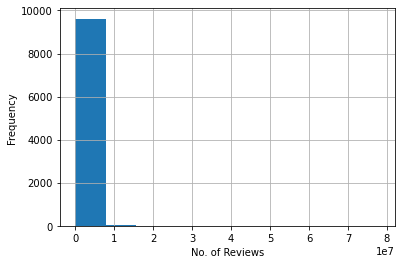

In [577]:
apps.Reviews = pd.to_numeric(apps['reviews'])
apps.Reviews.hist()
plt.xlabel('No. of Reviews')
plt.ylabel('Frequency')

In [578]:
apps['size']

0                      19M
1                      14M
2                     8.7M
3                      25M
4                     2.8M
               ...        
9655                   53M
9656                  3.6M
9657                  9.5M
9658    Varies with device
9659                   19M
Name: size, Length: 9660, dtype: object

* We can see that different apps sizes have 'M' which stands for MB (Megabytes).
Moreover, there is also a size 'Varies with device', we will now investigate using regex if there are other non-numerical sizes.

In [579]:
apps_clean[~apps_clean['size'].str.contains('M', regex= True, na=False)].head()

,app,category,rating,reviews,size,installs,type,price,content rating,genres,last updated,current ver,android ver
37,Floor Plan Creator,ART_AND_DESIGN,4.1,36639,Varies with device,"5,000,000+",Free,0,Everyone,Art & Design,"July 14, 2018",Varies with device,2.3.3 and up
42,Textgram - write on photos,ART_AND_DESIGN,4.4,295221,Varies with device,"10,000,000+",Free,0,Everyone,Art & Design,"July 30, 2018",Varies with device,Varies with device
52,Used Cars and Trucks for Sale,AUTO_AND_VEHICLES,4.6,17057,Varies with device,"1,000,000+",Free,0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device
58,Restart Navigator,AUTO_AND_VEHICLES,4.0,1403,201k,"100,000+",Free,0,Everyone,Auto & Vehicles,"August 26, 2014",1.0.1,2.2 and up
67,Ulysse Speedometer,AUTO_AND_VEHICLES,4.3,40211,Varies with device,"5,000,000+",Free,0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device


* We can see that different entries have 'Varies with device' as size. Moreover, some apps have a size in KB (labeled as 'k').

* We will now check if there are other strings or characters besides k, M and 'Varies with device'.

In [580]:
apps_clean[~apps_clean['size'].str.contains('[k,M,Varies with device]$', regex= True, na=False)].head()

,app,category,rating,reviews,size,installs,type,price,content rating,genres,last updated,current ver,android ver


* OK, the sizes are either in KB (k), MB(M) or Varies with device

* First, we will label the the size values that corresponds to Varies with device with 'NaN'

In [581]:
apps_clean['size'] = apps_clean['size'].replace('Varies with device', 'NaN', regex=True)

In [582]:
apps_clean['size']

0        19M
1        14M
2       8.7M
3        25M
4       2.8M
        ... 
9654     53M
9655    3.6M
9656    9.5M
9657     NaN
9658     19M
Name: size, Length: 9659, dtype: object

* Now, we will convert the sizes to KB and MB.

* We can see that different apps sizes have 'M' which stands for MB (Megabytes).<br>
Moreover, there is also a size 'Varies with device', we will now investigate using regex if there are other non-numerical sizes.

In [583]:
apps_clean[~apps_clean['size'].str.contains('M', regex= True, na=False)].head()

,app,category,rating,reviews,size,installs,type,price,content rating,genres,last updated,current ver,android ver
37,Floor Plan Creator,ART_AND_DESIGN,4.1,36639,NaN,"5,000,000+",Free,0,Everyone,Art & Design,"July 14, 2018",Varies with device,2.3.3 and up
42,Textgram - write on photos,ART_AND_DESIGN,4.4,295221,NaN,"10,000,000+",Free,0,Everyone,Art & Design,"July 30, 2018",Varies with device,Varies with device
52,Used Cars and Trucks for Sale,AUTO_AND_VEHICLES,4.6,17057,NaN,"1,000,000+",Free,0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device
58,Restart Navigator,AUTO_AND_VEHICLES,4.0,1403,201k,"100,000+",Free,0,Everyone,Auto & Vehicles,"August 26, 2014",1.0.1,2.2 and up
67,Ulysse Speedometer,AUTO_AND_VEHICLES,4.3,40211,NaN,"5,000,000+",Free,0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device


* We can see that different entries have 'Varies with device' as size. Moreover, some apps have a size in KB (labeled as 'k').

* We will now check if there are other strings or characters besides k, M and 'Varies with device'.

In [584]:
apps_clean[~apps_clean['size'].str.contains('[k,M,Varies with device]$', regex= True, na=False)].head()

,app,category,rating,reviews,size,installs,type,price,content rating,genres,last updated,current ver,android ver
37,Floor Plan Creator,ART_AND_DESIGN,4.1,36639,NaN,"5,000,000+",Free,0,Everyone,Art & Design,"July 14, 2018",Varies with device,2.3.3 and up
42,Textgram - write on photos,ART_AND_DESIGN,4.4,295221,NaN,"10,000,000+",Free,0,Everyone,Art & Design,"July 30, 2018",Varies with device,Varies with device
52,Used Cars and Trucks for Sale,AUTO_AND_VEHICLES,4.6,17057,NaN,"1,000,000+",Free,0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device
67,Ulysse Speedometer,AUTO_AND_VEHICLES,4.3,40211,NaN,"5,000,000+",Free,0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device
68,REPUVE,AUTO_AND_VEHICLES,3.9,356,NaN,"100,000+",Free,0,Everyone,Auto & Vehicles,"May 25, 2018",Varies with device,Varies with device


* OK, the sizes are either in KB (k), MB(M) or Varies with device

* First, we will label the the size values that corresponds to Varies with device with 'NaN'

In [585]:
apps_clean['size'] = apps_clean['size'].replace('Varies with device', 'NaN', regex=True)

In [586]:
apps_clean['size']

0        19M
1        14M
2       8.7M
3        25M
4       2.8M
        ... 
9654     53M
9655    3.6M
9656    9.5M
9657     NaN
9658     19M
Name: size, Length: 9659, dtype: object

* Now, we will convert the sizes to KB and MB.

In [587]:
size =[]

for i in apps_clean['size']:
    if i == 'NaN':
        size.append('NaN')
    elif i[-1] == 'k':
        size.append(float(i[:-1])/1000)
    else:
        size.append(float(i[:-1]))

In [588]:
apps_clean['size'] = size
apps_clean['size'] = apps_clean['size'].astype(float)
apps_clean.rename(columns={apps_clean.columns[4]:'size(MB)'}, inplace=True)

In [589]:
apps_clean.head()

,app,category,rating,reviews,size(MB),installs,type,price,content rating,genres,last updated,current ver,android ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


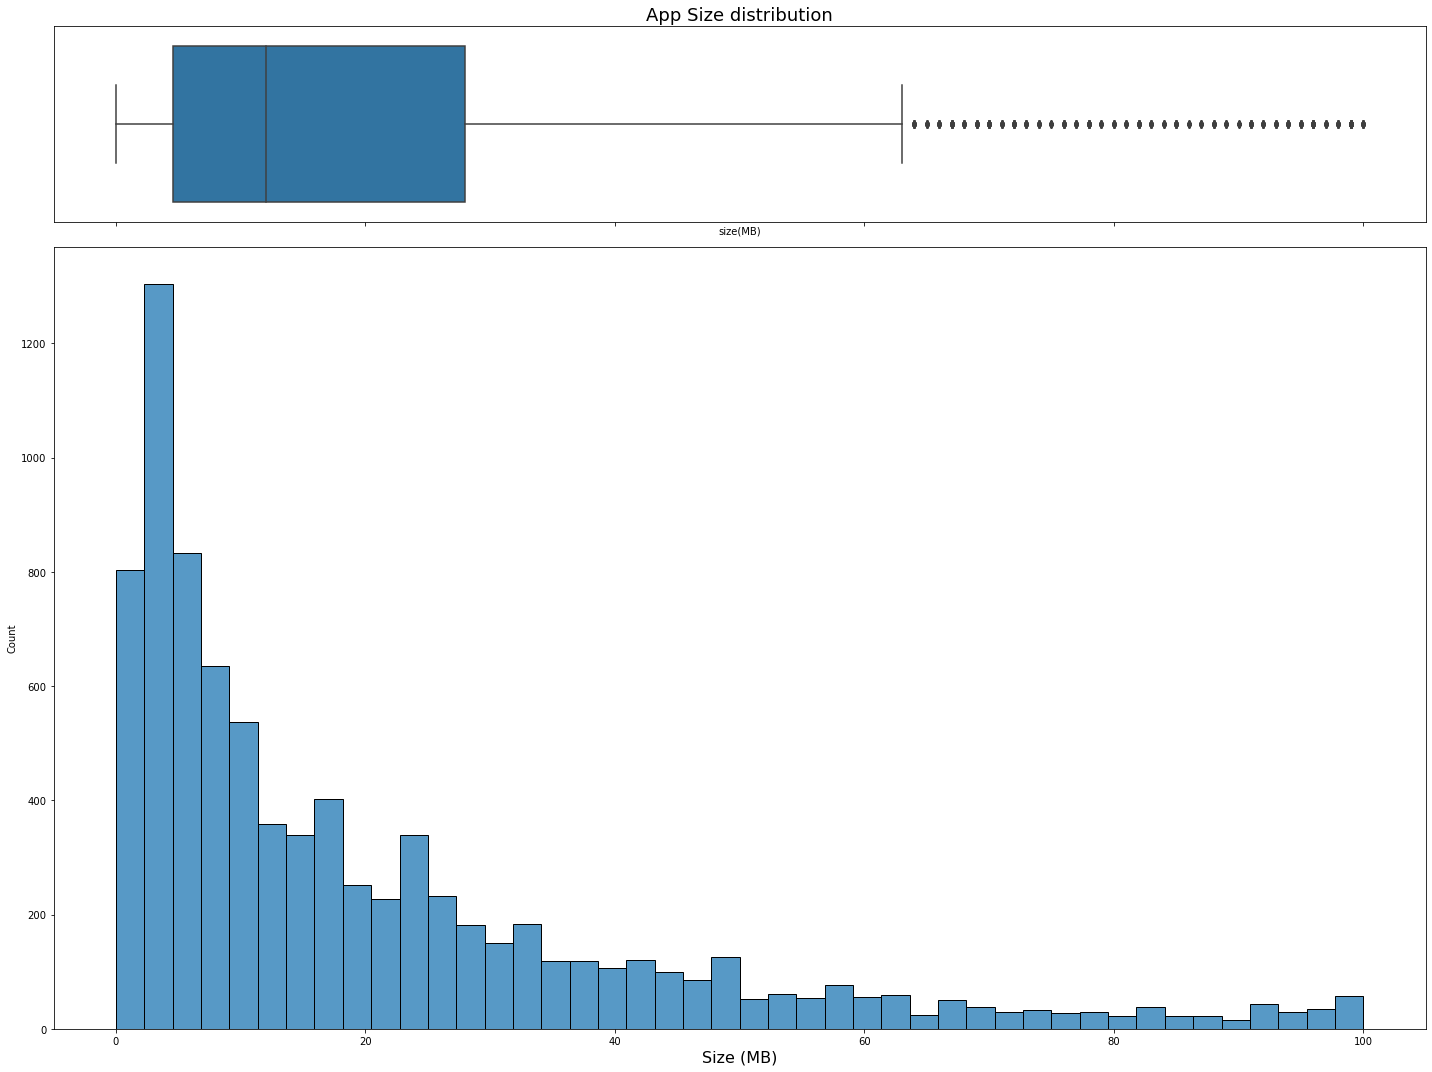

In [590]:
num_plots(apps_clean,'size(MB)','App Size distribution','Size (MB)')

* The distribution of app size is a right skewed long tail.

* Mean, Median and Mode can be computed as follows:

In [591]:
print('Average app size is: ', apps_clean['size(MB)'].mean())
print('Median app size is: ', apps_clean['size(MB)'].median())
print('Mode app size is: ', apps_clean['size(MB)'].mode()[0])

Average app size is:  20.39528931451608

Median app size is:  12.0

Mode app size is:  11.0


* Most of the apps have size lower than 20, and some apps have sizes around 100MB!

<a id="1"></a>
# <p style="padding:10px;background-color:#432C0A;margin:0;color:#c69c6c;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Rating</p>

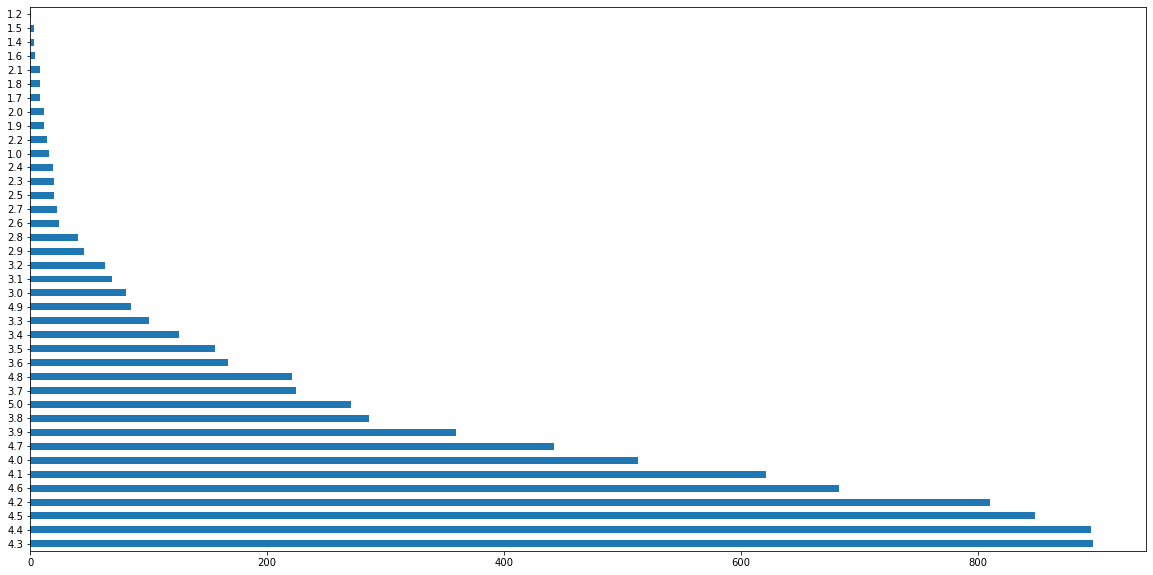

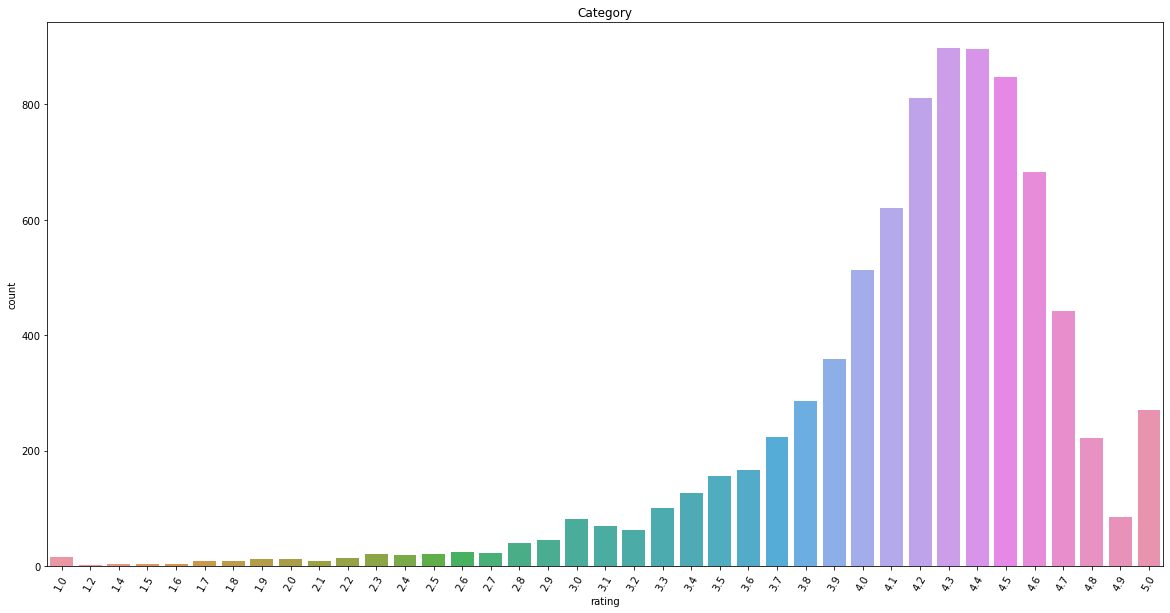

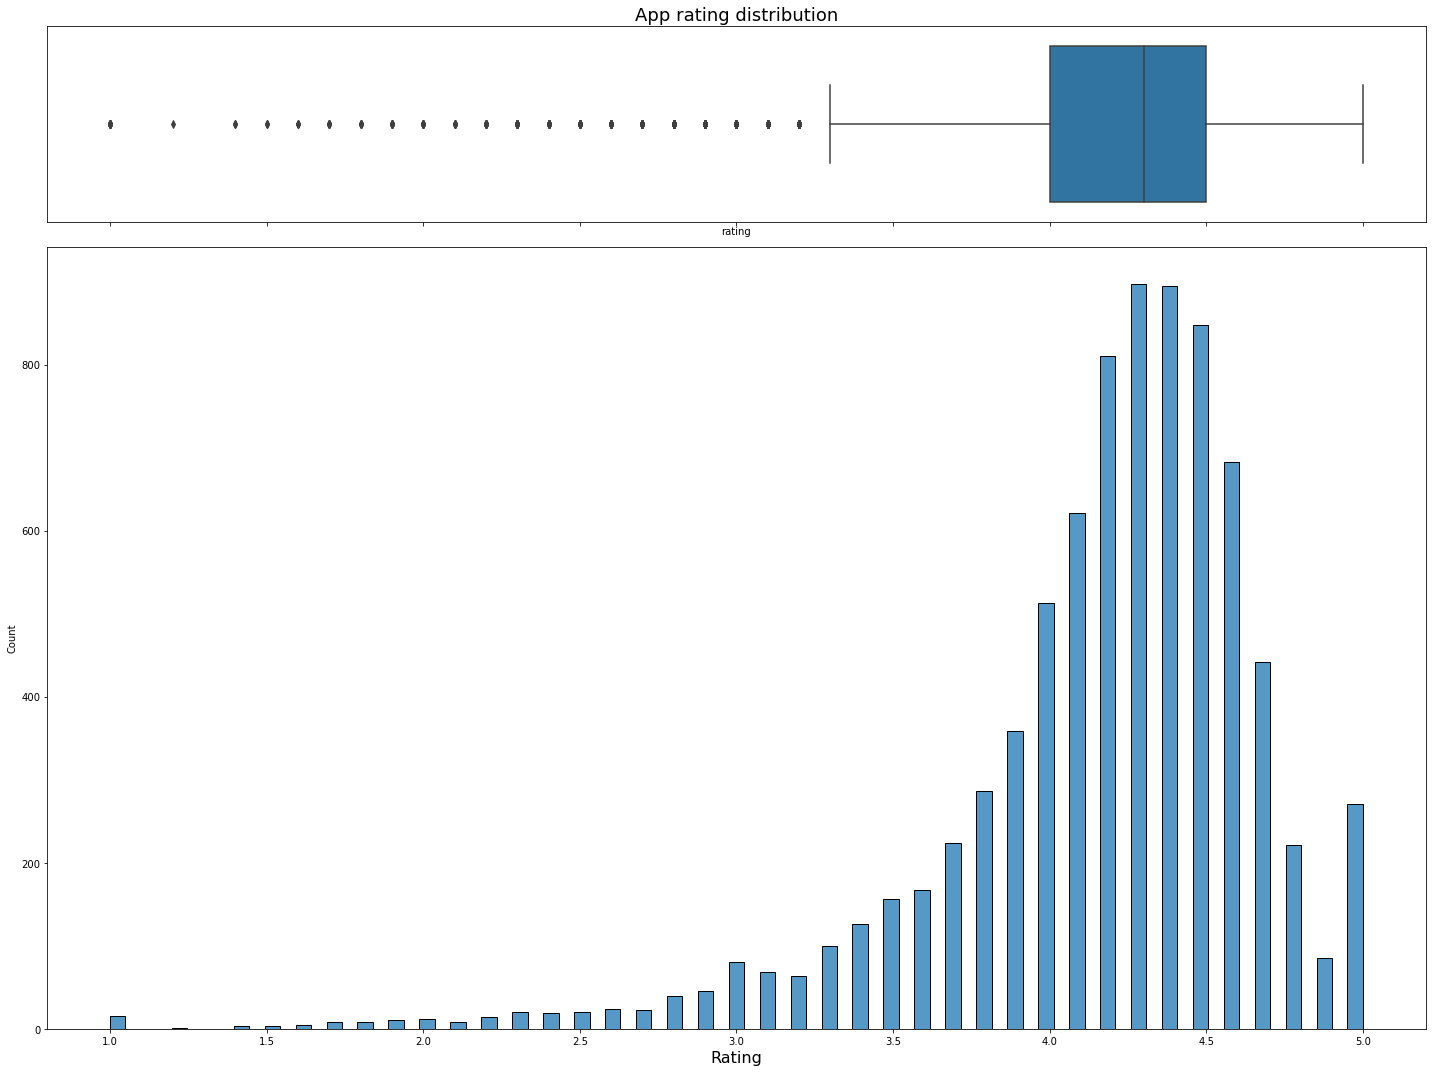

In [592]:
apps['rating'].value_counts().plot(kind='barh', figsize=(20,10))

plt.figure(figsize=(20,10))
category_chart = sns.countplot(data=apps, x='rating')
plt.xticks(rotation=60)
category_chart.set_title('Category')

num_plots(apps_clean,'rating','App rating distribution','Rating')

In [593]:
print('Average app rating is: ', apps_clean['rating'].mean())
print('Median app rating is: ', apps_clean['rating'].median())
print('Mode app rating is: ', apps_clean['rating'].mode()[0])

Average app rating is:  4.173243045387998

Median app rating is:  4.3

Mode app rating is:  4.3


Most of the apps have rating around 4.2. We can also see that some apps have 1 star rating, which are those apps?

In [594]:
apps_clean[apps_clean['rating'] <= 1.0]

,app,category,rating,reviews,size(MB),installs,type,price,content rating,genres,last updated,current ver,android ver
524,House party - live chat,DATING,1.0,1,9.2,10+,Free,0,Mature 17+,Dating,"July 31, 2018",3.52,4.0.3 and up
3268,Speech Therapy: F,FAMILY,1.0,1,16.0,10+,Paid,$2.99,Everyone,Education,"October 7, 2016",1.0,2.3.3 and up
4199,Clarksburg AH,MEDICAL,1.0,1,28.0,50+,Free,0,Everyone,Medical,"May 1, 2017",300000.0.81,4.0.3 and up
4986,Truck Driving Test Class 3 BC,FAMILY,1.0,1,2.0,50+,Paid,$1.49,Everyone,Education,"April 9, 2012",1.0,2.1 and up
5311,BJ Bridge Standard American 2018,GAME,1.0,1,4.9,"1,000+",Free,0,Everyone,Card,"May 21, 2018",6.2-sayc,4.0 and up
5479,MbH BM,MEDICAL,1.0,1,2.3,100+,Free,0,Everyone,Medical,"December 14, 2016",1.1.3,4.3 and up
6100,CB Mobile Biz,FINANCE,1.0,3,8.4,500+,Free,0,Everyone,Finance,"February 22, 2016",4.4.1255,4.0 and up
6336,Thistletown CI,PRODUCTIVITY,1.0,1,6.6,100+,Free,0,Everyone,Productivity,"March 15, 2018",41.9,4.1 and up
6380,CJ DVD Rentals,COMMUNICATION,1.0,5,13.0,100+,Free,0,Everyone,Communication,"October 6, 2017",1.0,4.1 and up
6747,CR Magazine,BUSINESS,1.0,1,7.8,100+,Free,0,Everyone,Business,"July 23, 2014",2.4.2,2.3.3 and up


In [595]:
print('Apps with rating equal or lower than 1 star: ',len(apps_clean[apps_clean['rating'] <= 1.0]))

Apps with rating equal or lower than 1 star:  16


<a id="1"></a>
# <p style="padding:10px;background-color:#432C0A;margin:0;color:#c69c6c;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Price</p>

In [596]:
apps_clean.price.isnull().sum()

0

There are no missing values in the price column

In [597]:
apps_clean['price'] = apps_clean['price'].str.replace('$','').astype(float)

In [598]:
apps_clean['price'].value_counts()

0.00      8903
0.99       145
2.99       124
1.99        73
4.99        70
          ... 
18.99        1
389.99       1
19.90        1
1.75         1
1.04         1
Name: price, Length: 92, dtype: int64

We can see that most of the apps are free!<br>

In [599]:
print('Free apps are {}% of the total apps in the dataset'.format(np.round(len(apps_clean[apps_clean['price']==0])*100/len(apps_clean)),2))

Free apps are 92.0% of the total apps in the dataset


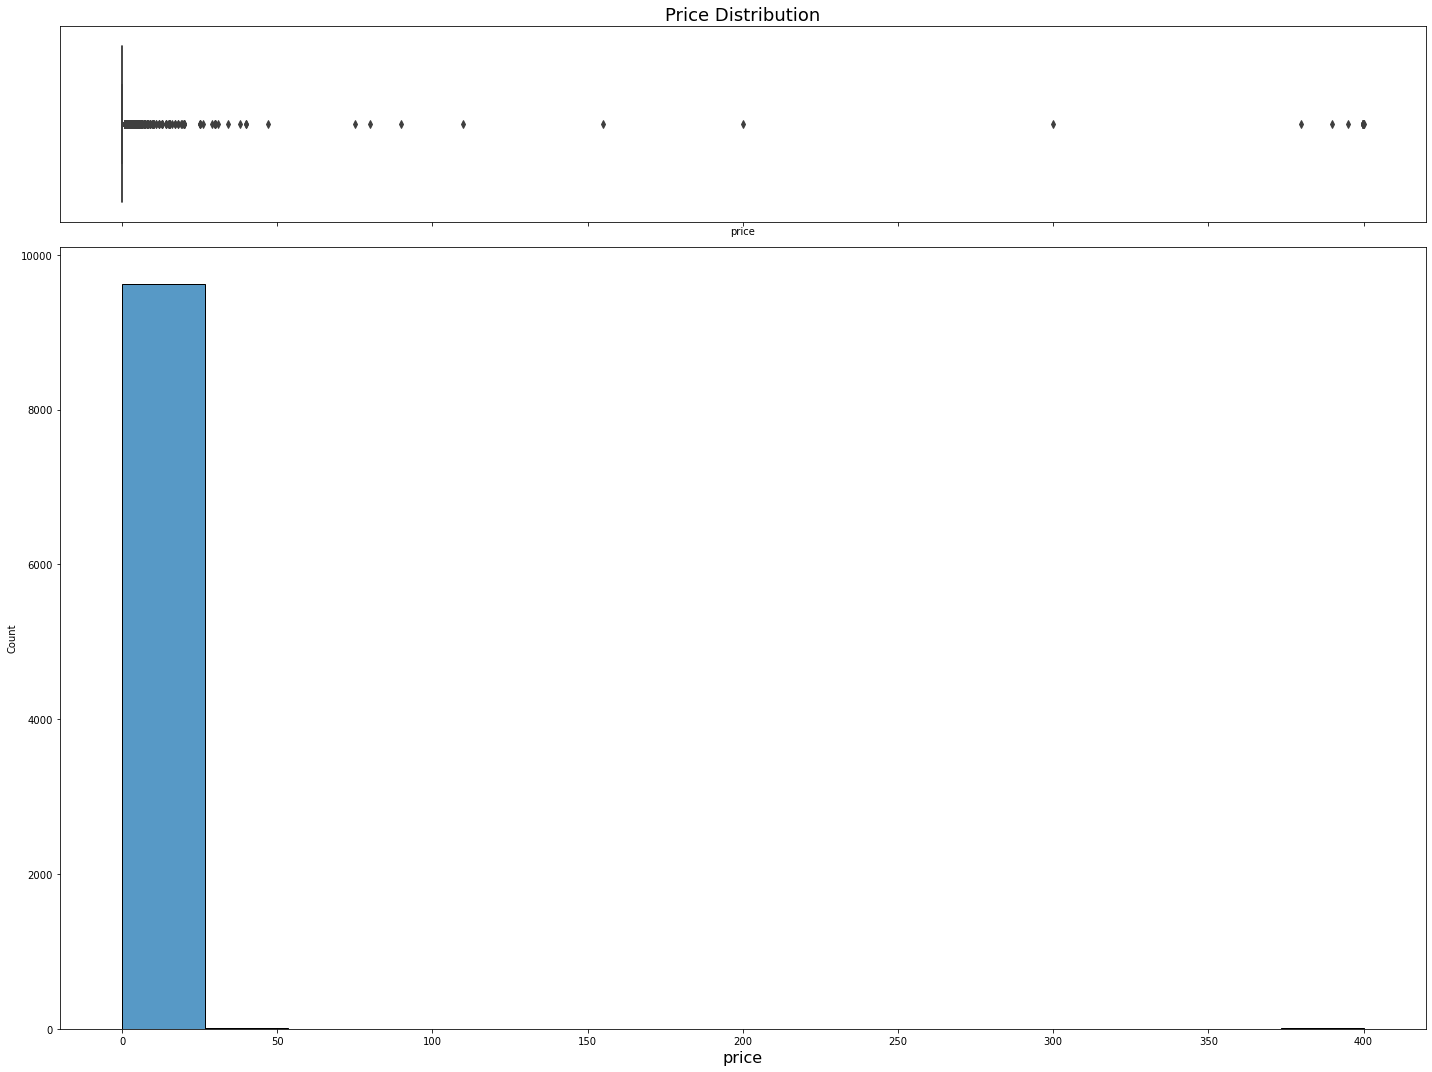

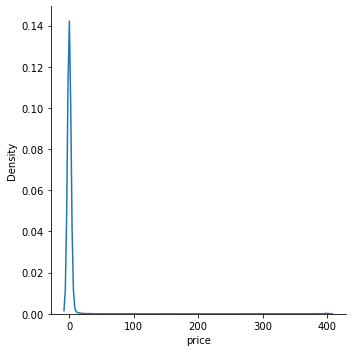

In [600]:
num_plots(apps_clean,'price','Price Distribution','price')
sns.displot(apps_clean, x="price", kind="kde")

We can confirm the great majority of free apps in the store. However, there are some apps with a price over 50\\$, and some of them even cost 400\\$!

To better visualize the price distribution, we will separately analyze apps with a price lower than 10\\$ and apps with a price higher than 10\\$

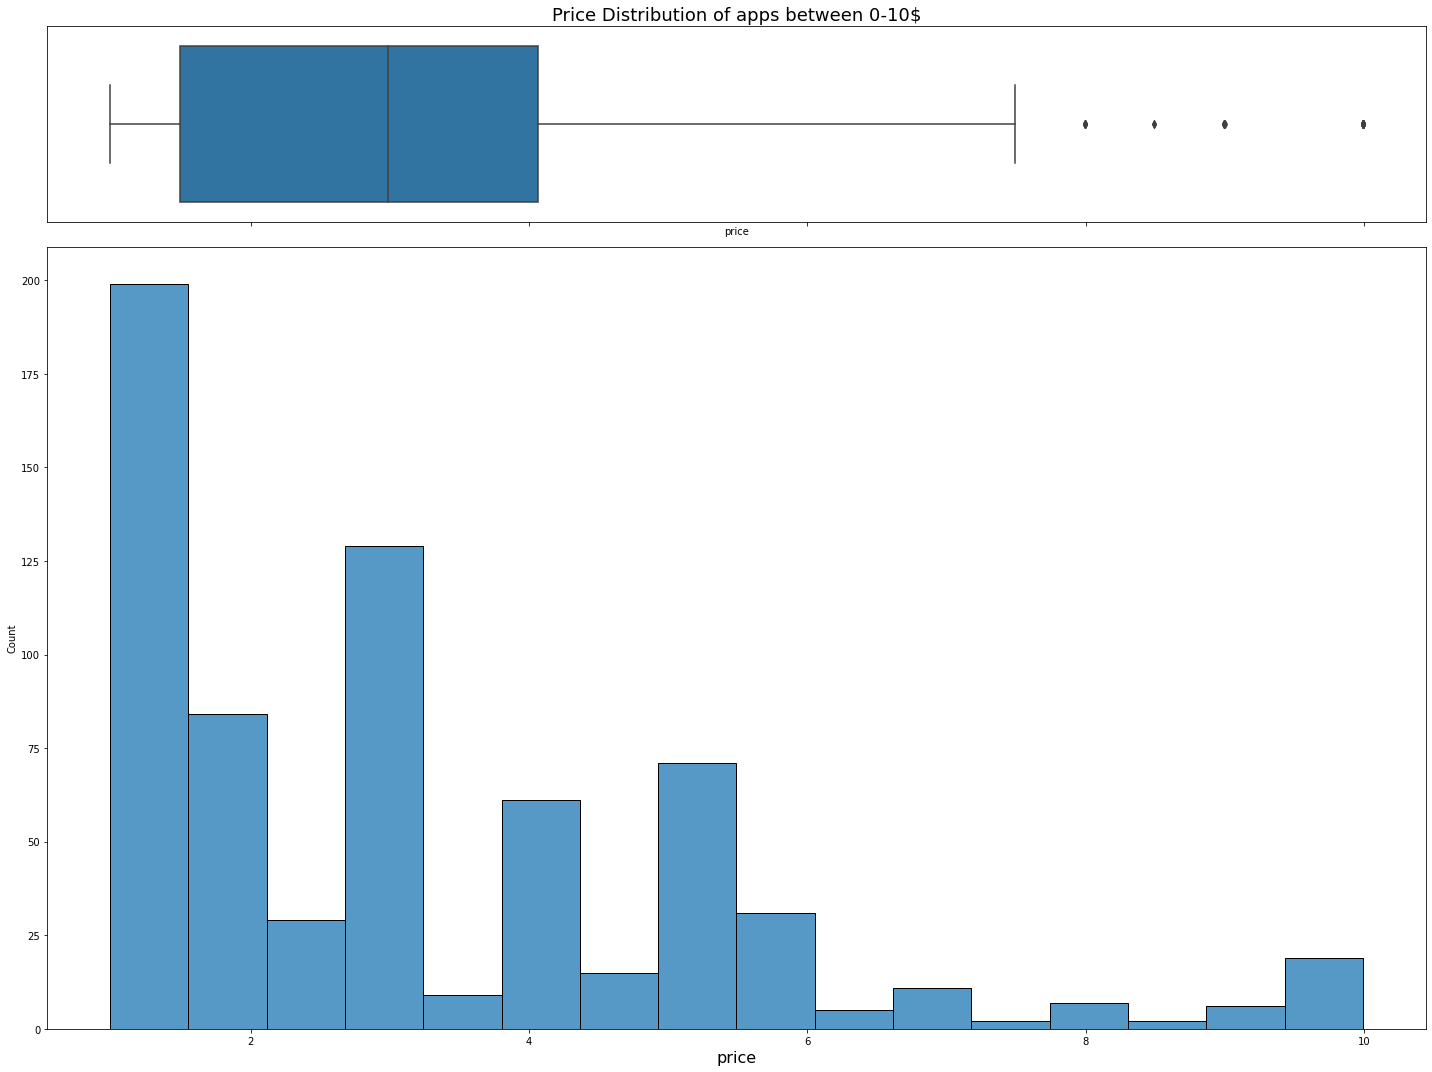

In [601]:
num_plots(apps_clean[(apps_clean['price']>0) & (apps_clean['price']<10)],'price','Price Distribution of apps between 0-10$','price')

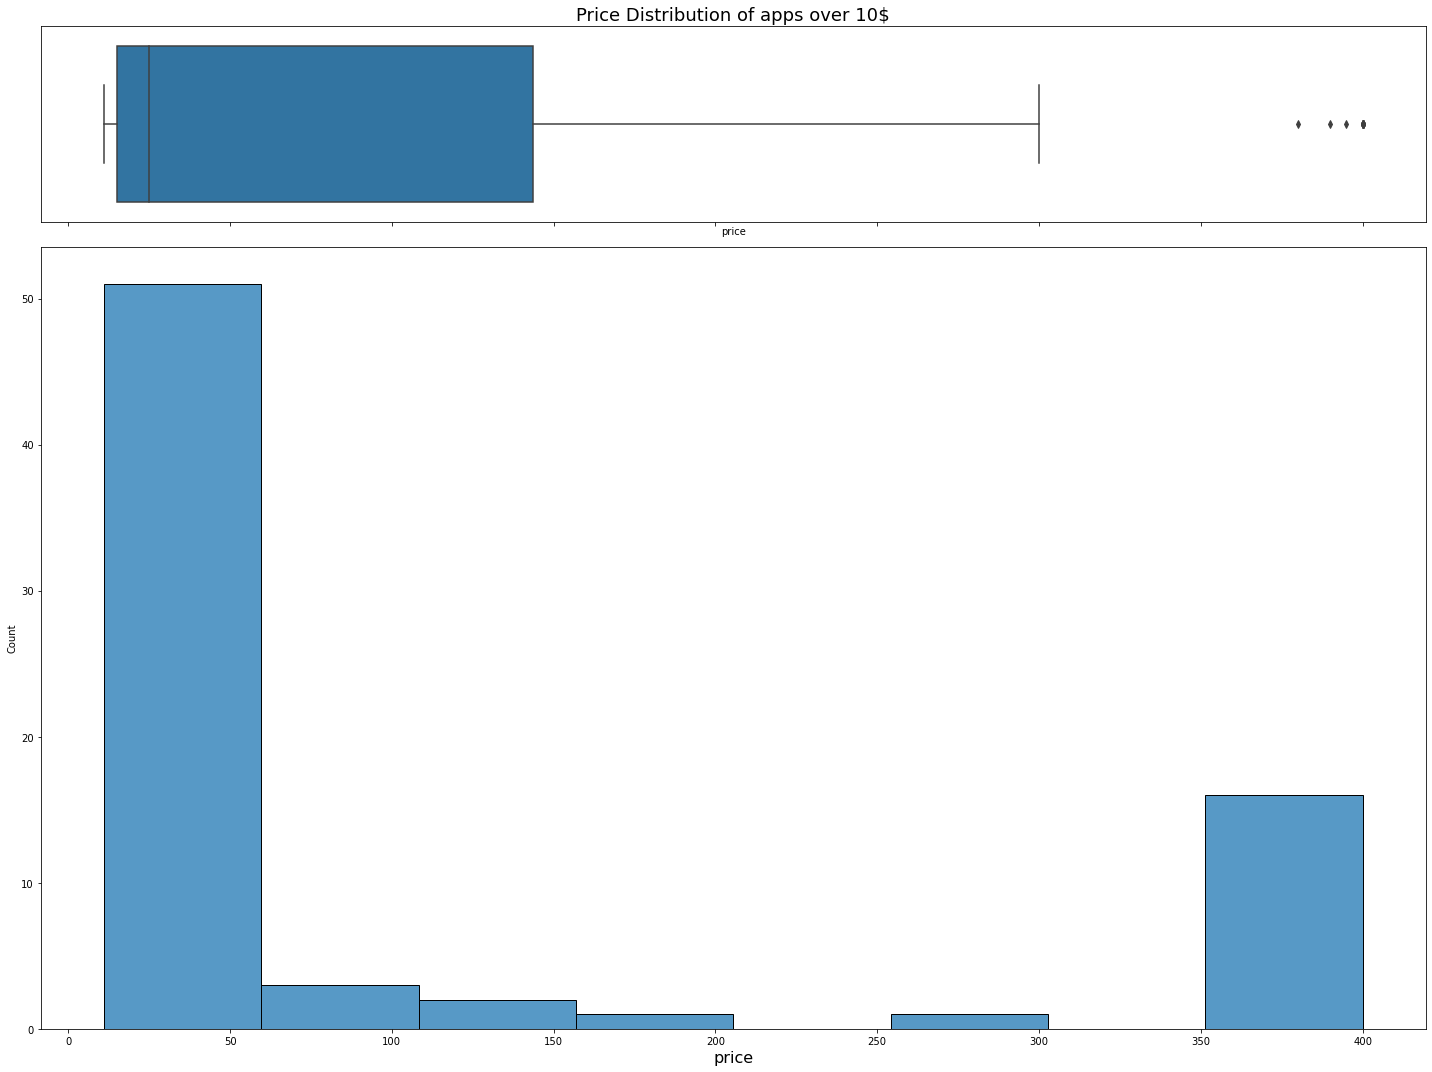

In [602]:
num_plots(apps_clean[(apps_clean['price']>10)],'price','Price Distribution of apps over 10$','price')

There are some apps with a price close to 400$, let's investigate more.

In [603]:
apps_clean[apps_clean['price']>350]

,app,category,rating,reviews,size(MB),installs,type,price,content rating,genres,last updated,current ver,android ver
3327,most expensive app (H),FAMILY,4.3,6,1.500,100+,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
3465,💎 I'm rich,LIFESTYLE,3.8,718,26.000,"10,000+",Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
3469,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.300,"10,000+",Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
4396,I am rich,LIFESTYLE,3.8,3547,1.800,"100,000+",Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
4398,I am Rich Plus,FAMILY,4.0,856,8.700,"10,000+",Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
4400,I Am Rich Premium,FINANCE,4.1,1867,4.700,"50,000+",Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
4401,I am extremely Rich,LIFESTYLE,2.9,41,2.900,"1,000+",Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
4402,I am Rich!,FINANCE,3.8,93,22.000,"1,000+",Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
4403,I am rich(premium),FINANCE,3.5,472,0.965,"5,000+",Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up
4406,I Am Rich Pro,FAMILY,4.4,201,2.700,"5,000+",Paid,399.99,Everyone,Entertainment,"May 30, 2017",1.54,1.6 and up


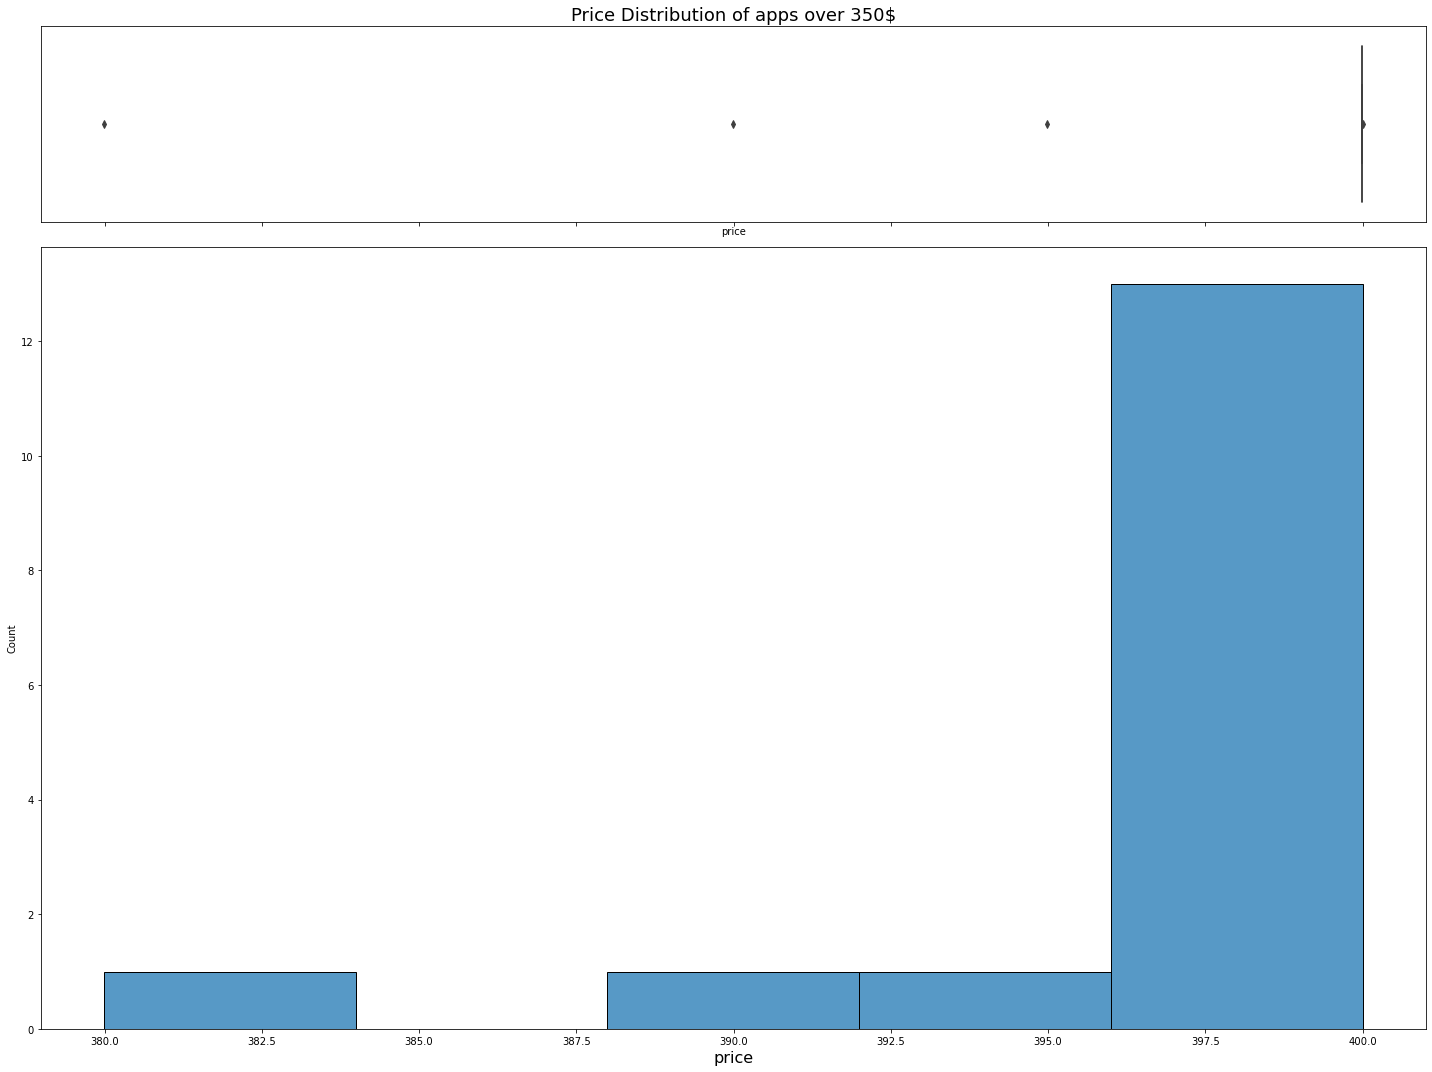

In [604]:
num_plots(apps_clean[apps_clean['price']>350],'price','Price Distribution of apps over 350$','price')

* Some apps have price higher than 350. Out of curiosity I checked the apps to see if there is a problem with data. But no !! they do exist, and Yes !! people buy them.

* It looks like these apps are 'meme apps'. They do not do anything. They just cost a lot of money.

* What about the other apps which cost more than 50\\$ but less than 350\\$?

In [605]:
apps_clean[(apps_clean['price']>50) & (apps_clean['price']<350)]

,app,category,rating,reviews,size(MB),installs,type,price,content rating,genres,last updated,current ver,android ver
1755,Vargo Anesthesia Mega App,MEDICAL,4.6,92,32.0,"1,000+",Paid,79.99,Everyone,Medical,"June 18, 2018",19.0,4.0.3 and up
1881,Language Therapy: Aphasia,MEDICAL,NaN,10,28.0,"1,000+",Paid,74.99,Everyone,Medical,"June 25, 2018",3.1.1,4.0.3 and up
4399,I am rich VIP,LIFESTYLE,3.8,411,2.6,"10,000+",Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5599,BP Fitness Lead Scanner,EVENTS,NaN,0,6.7,1+,Paid,109.99,Everyone,Events,"August 23, 2017",0.0.1,4.1 and up
5661,cronometra-br,PRODUCTIVITY,NaN,0,5.4,0+,Paid,154.99,Everyone,Productivity,"November 24, 2017",1.0.0,4.1 and up
8577,EP Cook Book,MEDICAL,NaN,0,3.2,0+,Paid,200.00,Everyone,Medical,"July 26, 2015",1.0,3.0 and up
8588,Lean EQ,BUSINESS,NaN,6,10.0,10+,Paid,89.99,Everyone,Business,"February 14, 2017",1.0,4.1 and up


* Among these apps, there is still one meme app 'I am rich VIP', while the others looks to be 'serious apps'. However, these apps do not have any reviews or rating.

In [606]:
print('Number of apps with price higher than 50$: ', len(apps_clean.loc[apps_clean['price']>50]))

Number of apps with price higher than 50$:  23


* We will remove apps with a price over 50 dollars, since there are very few of them and make the distribution of price heavily right skewed: they can be considered as outliers.

In [607]:
apps_clean = apps_clean.loc[apps_clean['price'] < 50]

* What is the distribution of the paid apps?

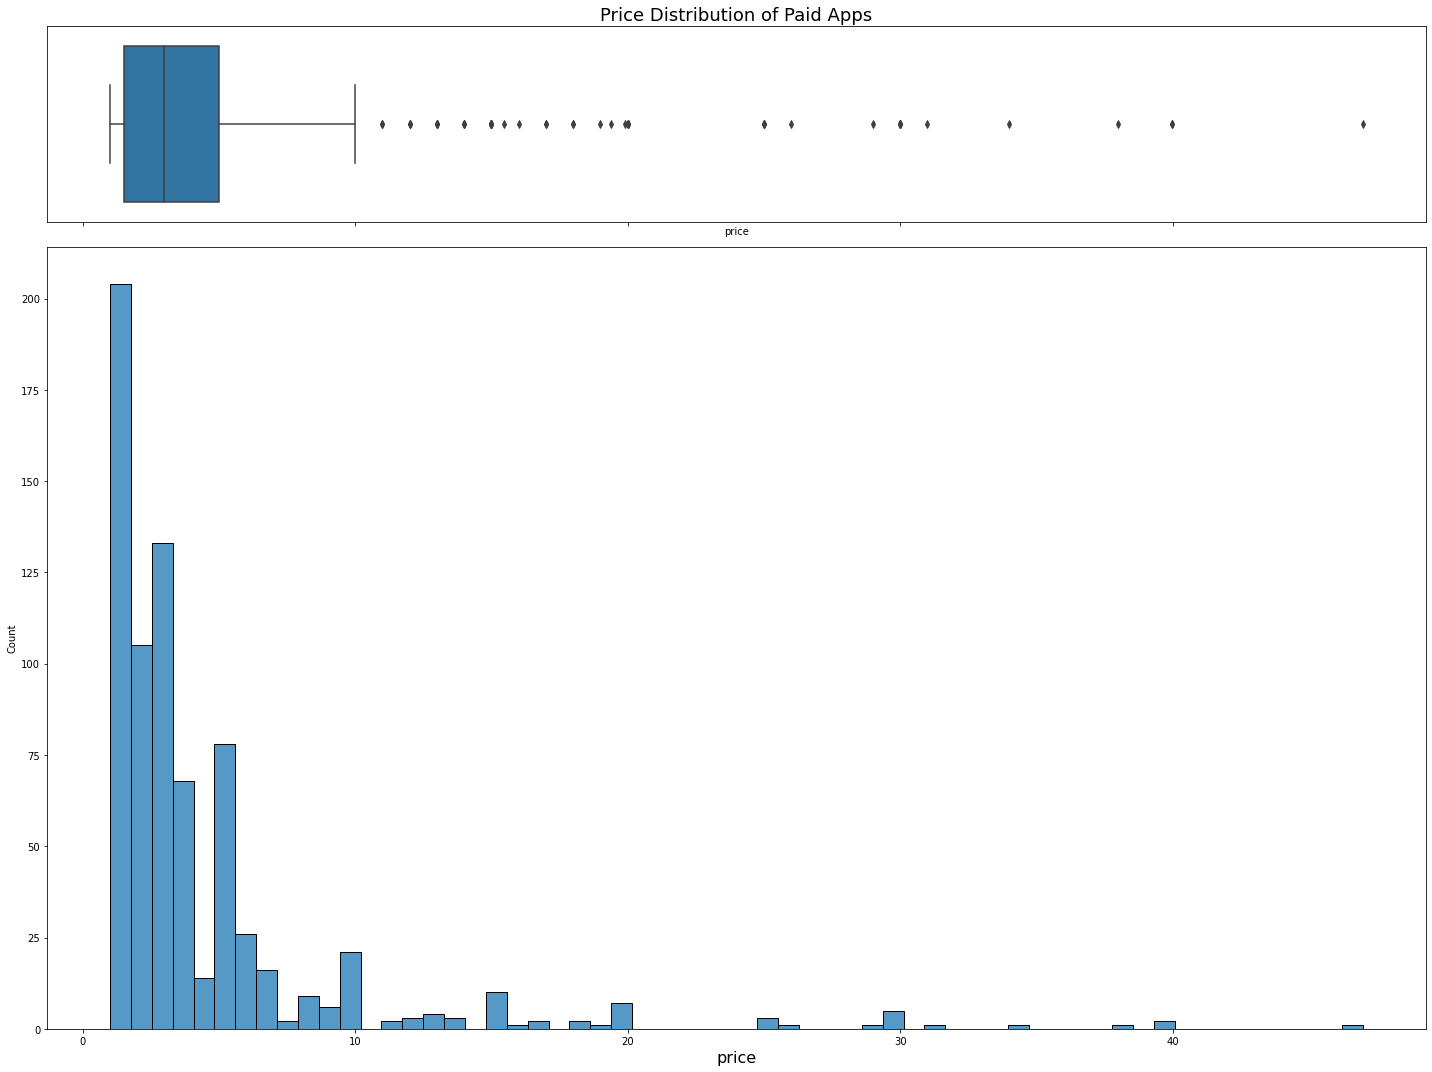

In [608]:
num_plots(apps_clean.loc[apps_clean['price'] > 0],'price','Price Distribution of Paid Apps','price')

* We still have a right skewed distribution, but we can see the median and the IQR in the boxplot now!

* By looking at this plot, we decide to only consider apps with a price lower than 20\\$. We will drop apps with a price higher than 20\\$.

In [609]:
apps_clean = apps_clean.loc[apps_clean['price']<20]

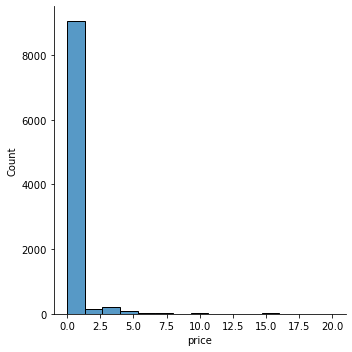

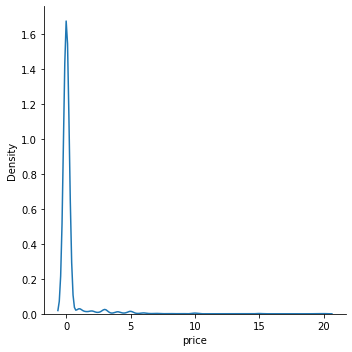

In [610]:
sns.displot(apps_clean, x="price")
sns.displot(apps_clean, x="price", kind="kde")

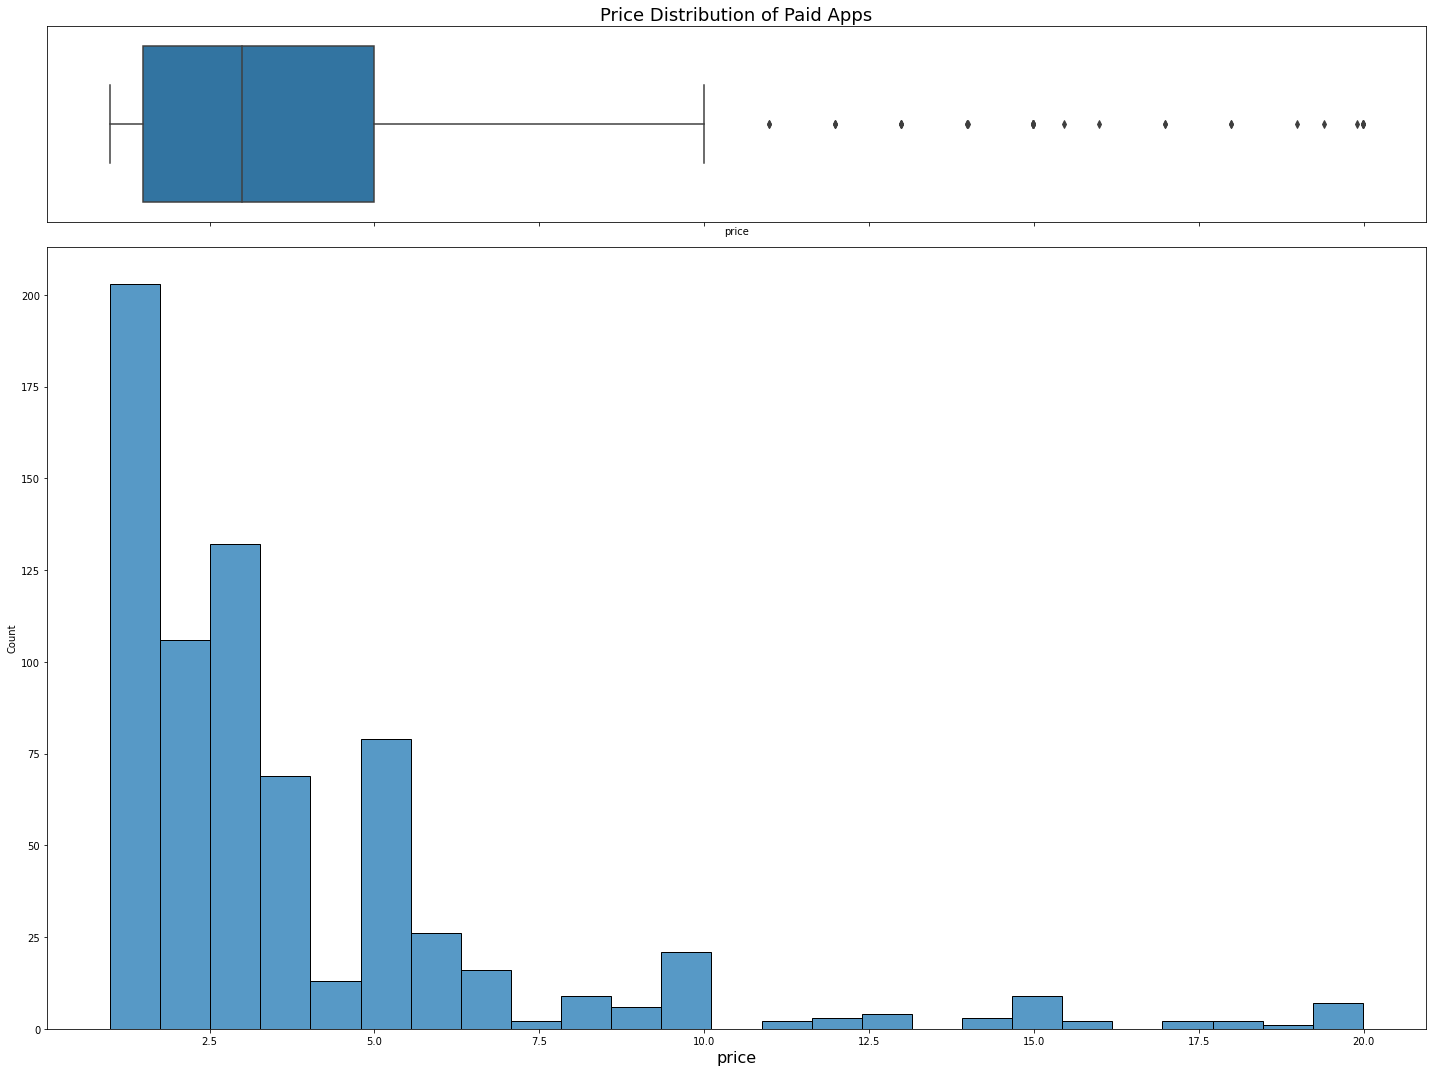

In [611]:
num_plots(apps_clean.loc[apps_clean['price'] > 0],'price','Price Distribution of Paid Apps','price')

<a id="1"></a>
# <p style="padding:10px;background-color:#432C0A;margin:0;color:#c69c6c;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">install</p>

In [612]:
apps_clean['installs']

0           10,000+
1          500,000+
2        5,000,000+
3       50,000,000+
4          100,000+
           ...     
9654         5,000+
9655           100+
9656         1,000+
9657         1,000+
9658    10,000,000+
Name: installs, Length: 9620, dtype: object

* We will remove the '+' from the rows and add it to the feature name!

In [613]:
apps_clean['installs'] = apps_clean['installs'].str.replace('+','').str.replace(',','').astype(float)

In [614]:
apps_clean.rename(columns={apps_clean.columns[5]:'Installs(+)'}, inplace=True)

<AxesSubplot:xlabel='Installs(+)', ylabel='Density'>

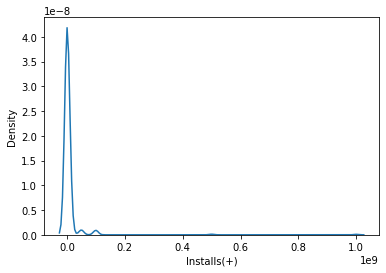

In [615]:
sns.kdeplot(x='Installs(+)', data=apps_clean)

Text(0, 0.5, 'Frequency')

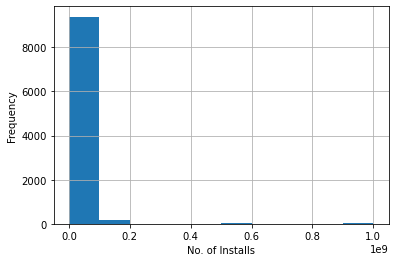

In [616]:
apps.Installs = pd.to_numeric(apps_clean['Installs(+)'])
apps.Installs=pd.to_numeric(apps_clean['Installs(+)'])
apps.Installs.hist();
plt.xlabel('No. of Installs')
plt.ylabel('Frequency')

Text(0.5, 1.0, 'Installs')

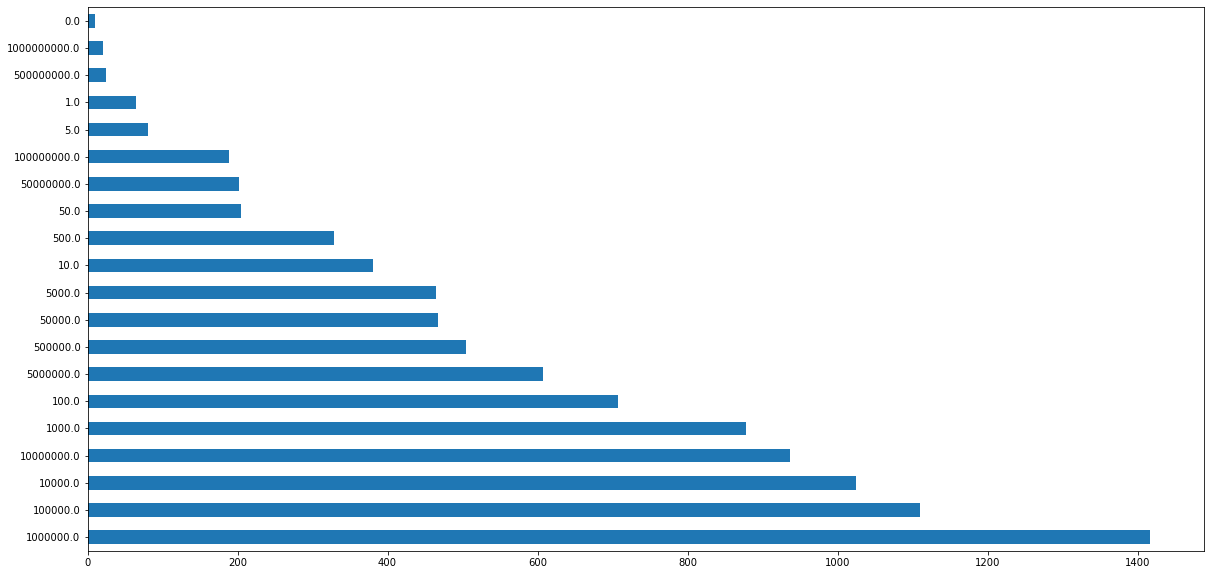

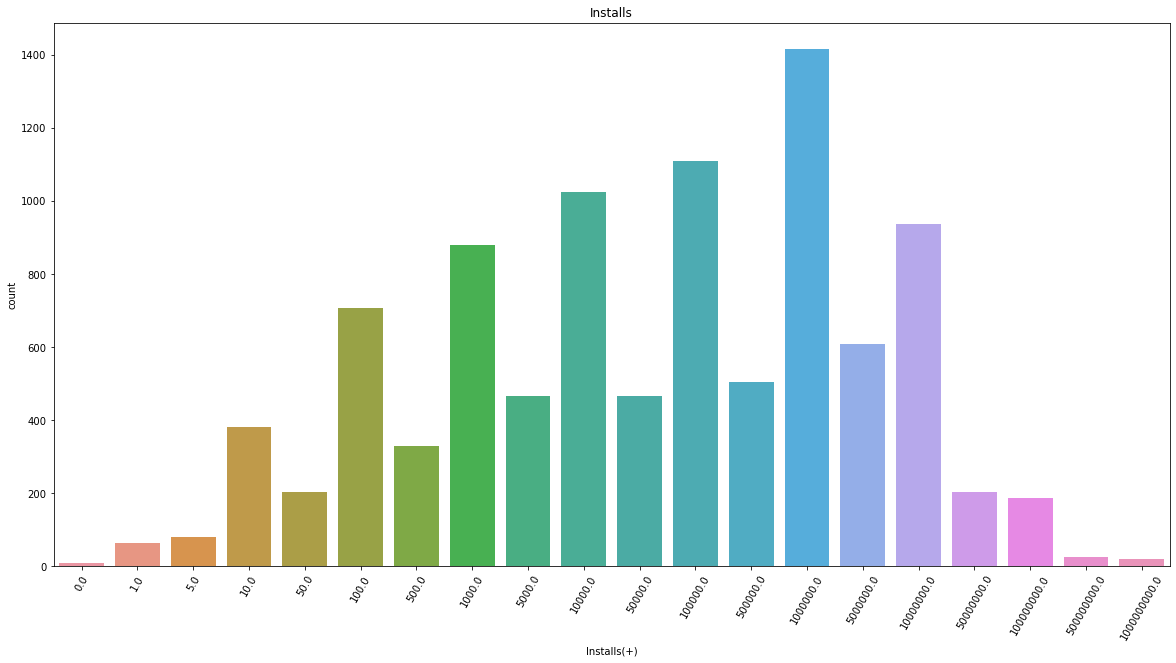

In [617]:
apps_clean['Installs(+)'].value_counts().plot(kind='barh', figsize=(20,10))

plt.figure(figsize=(20,10))
category_chart = sns.countplot(data=apps_clean, x='Installs(+)')
plt.xticks(rotation=60)
category_chart.set_title('Installs')

* Most of the apps installs are relative small compared to the maximum, which is around 1e9 (a billion).


<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="padding:10px;background-color:#432C0A;margin:0;color:#c69c6c;font-family:newtimeroman;font-size:130%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Which are the apps with these high numbers of installs?</p>   
    

In [618]:
apps_clean[apps_clean['Installs(+)']> 0.8e9 ]

,app,category,rating,reviews,size(MB),Installs(+),type,price,content rating,genres,last updated,current ver,android ver
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233,NaN,1.000000e+09,Free,0.0,Teen,Books & Reference,"August 3, 2018",Varies with device,Varies with device
299,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,NaN,1.000000e+09,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
300,WhatsApp Messenger,COMMUNICATION,4.4,69119316,NaN,1.000000e+09,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
302,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,NaN,1.000000e+09,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
304,Gmail,COMMUNICATION,4.3,4604324,NaN,1.000000e+09,Free,0.0,Everyone,Communication,"August 2, 2018",Varies with device,Varies with device
305,Hangouts,COMMUNICATION,4.0,3419249,NaN,1.000000e+09,Free,0.0,Everyone,Communication,"July 21, 2018",Varies with device,Varies with device
349,Skype - free IM & video calls,COMMUNICATION,4.1,10484169,NaN,1.000000e+09,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
701,Google Play Games,ENTERTAINMENT,4.3,7165362,NaN,1.000000e+09,Free,0.0,Teen,Entertainment,"July 16, 2018",Varies with device,Varies with device
1356,Subway Surfers,GAME,4.5,27722264,76.0,1.000000e+09,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
2002,Facebook,SOCIAL,4.1,78158306,NaN,1.000000e+09,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device


* The apps with most installs are famous social network apps like Facebook, Instagram and Google apps.

<AxesSubplot:xlabel='Installs(+)'>

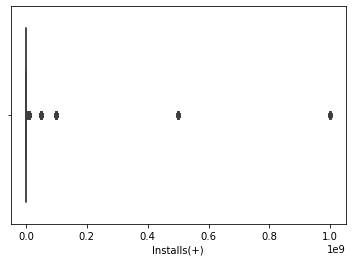

In [619]:
sns.boxplot(x='Installs(+)', data=apps_clean)

* It is becoming difficult to visualize the box fences! We'll define a function to obtain them

In [620]:
def iqr_fence(x):
    Q1 = x.quantile(0.25)
    Q3 = x.quantile(0.75)
    IQR = Q3 - Q1
    Lower_Fence = Q1 - (1.5 * IQR)
    Upper_Fence = Q3 + (1.5 * IQR)
    u = max(x[x<Upper_Fence])
    l = min(x[x>Lower_Fence])
    return [u,l]

In [621]:
upper, lower = iqr_fence(apps_clean['Installs(+)'])
print('Upper Fence:', upper)
print('Lower Fence:', lower)

Upper Fence: 1000000.0

Lower Fence: 0.0


* We can see that the lower fence is 0 installs, while the higher fence is 1 million installs.

In [622]:
print('Total apps', len(apps_clean))
no_installs = [1e9, 1e8, 1e7, 1e6, 1e5, 1e4, 1e3, 1e2, 1e1]
for n in no_installs:
    print('Number of apps with less than ' + str(n) + ' installs:', len(apps_clean.loc[apps_clean['Installs(+)']<n]))

Total apps 9620

Number of apps with less than 1000000000.0 installs: 9600

Number of apps with less than 100000000.0 installs: 9388

Number of apps with less than 10000000.0 installs: 8249

Number of apps with less than 1000000.0 installs: 6225

Number of apps with less than 100000.0 installs: 4610

Number of apps with less than 10000.0 installs: 3118

Number of apps with less than 1000.0 installs: 1775

Number of apps with less than 100.0 installs: 740

Number of apps with less than 10.0 installs: 156


* We can see that there are quite few apps with just 10 or 100 reviews.

<a id="1"></a>
# <p style="padding:10px;background-color:#432C0A;margin:0;color:#c69c6c;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Categorical Features Cleaning and Analysis</p>

## Category analysis

In [623]:
print('In total there are {} different app categories'. format(len(apps_clean['category'].value_counts())))

In total there are 33 different app categories


Text(0.5, 1.0, 'Category')

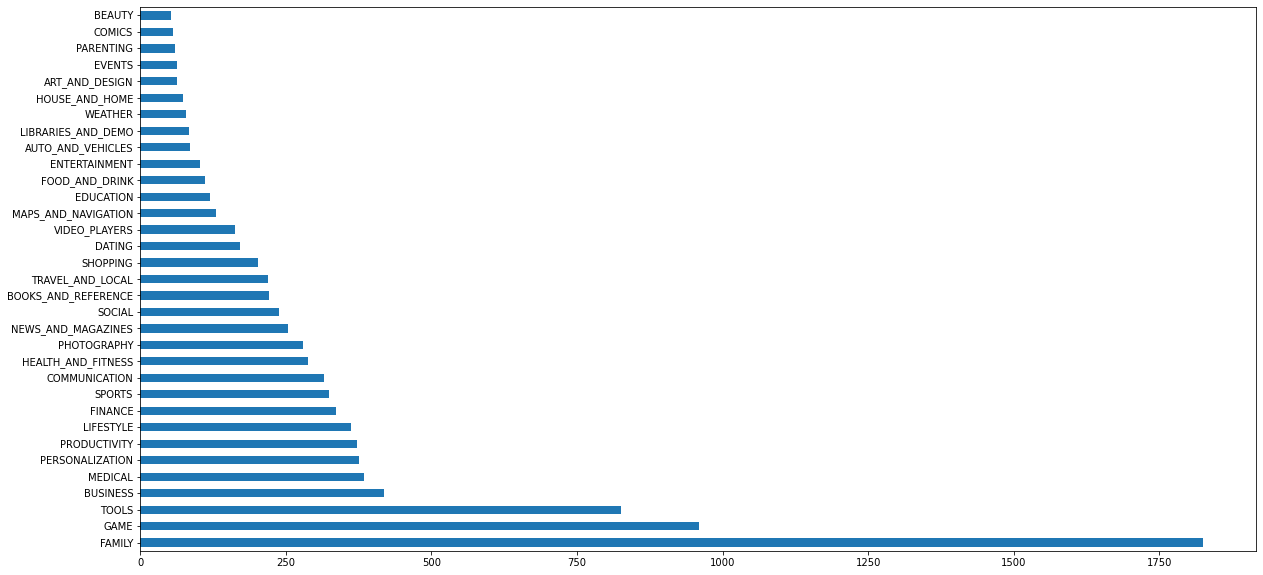

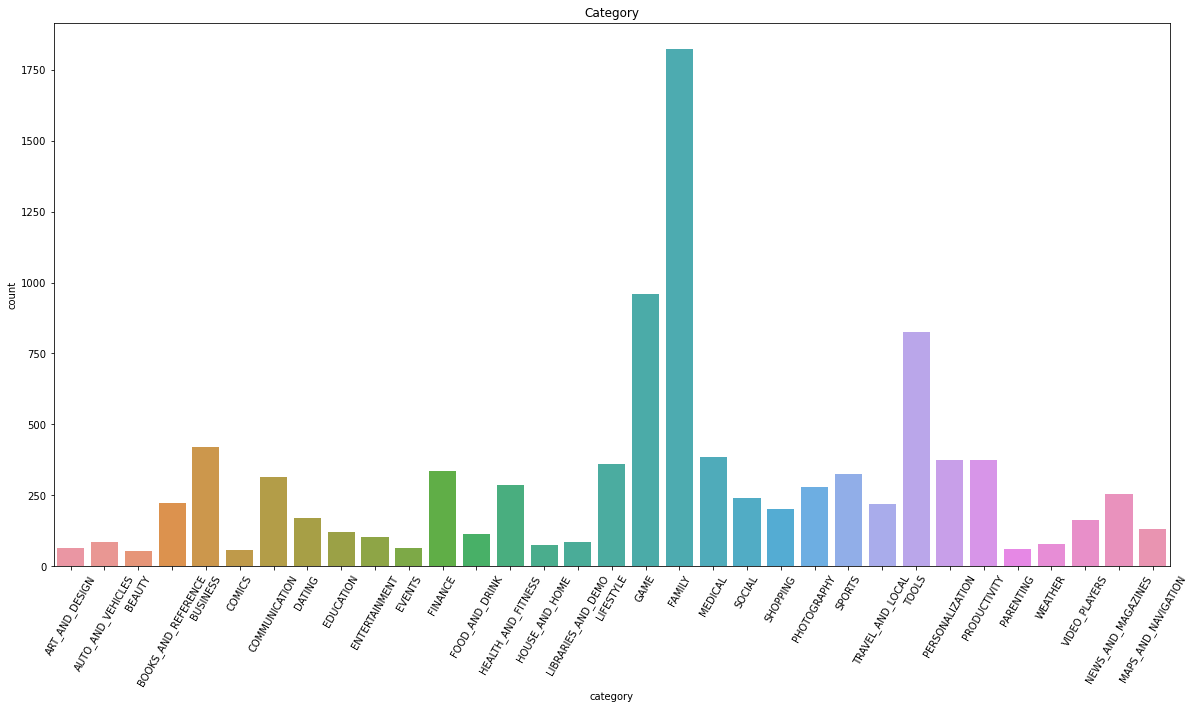

In [624]:
apps_clean['category'].value_counts().plot(kind='barh', figsize=(20,10))

plt.figure(figsize=(20,10))
category_chart = sns.countplot(data=apps_clean, x='category')
plt.xticks(rotation=60)
category_chart.set_title('Category')

* The most popular categories are family, game and tools
* Interestingly, Tools, Business and Medical apps are also catching up.


<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="padding:10px;background-color:#432C0A;margin:0;color:#c69c6c;font-family:newtimeroman;font-size:130%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Is there any difference between the category column and genres?</p>   
    

In [625]:
apps_clean[['category','genres']]

,category,genres
0,ART_AND_DESIGN,Art & Design
1,ART_AND_DESIGN,Art & Design;Pretend Play
2,ART_AND_DESIGN,Art & Design
3,ART_AND_DESIGN,Art & Design
4,ART_AND_DESIGN,Art & Design;Creativity
...,...,...
9654,FAMILY,Education
9655,FAMILY,Education
9656,MEDICAL,Medical
9657,BOOKS_AND_REFERENCE,Books & Reference


* It looks like they are slightly different

<a id="1"></a>
# <p style="padding:10px;background-color:#432C0A;margin:0;color:#c69c6c;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Type</p>

Text(0.5, 1.0, 'Type')

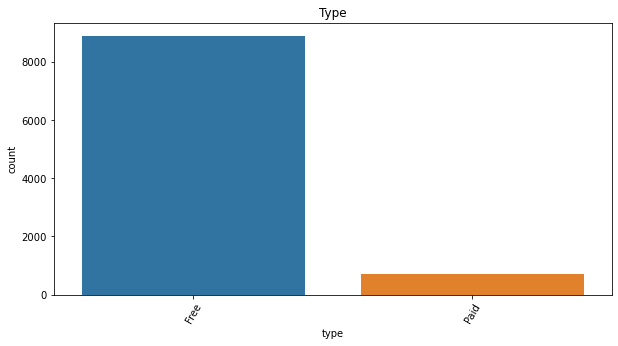

In [626]:
plt.figure(figsize=(10,5))
category_chart = sns.countplot(data=apps_clean, x='type')
plt.xticks(rotation=60)
category_chart.set_title('Type')

* Most of the apps are free, as we saw during the price column analysis

<a id="1"></a>
# <p style="padding:10px;background-color:#432C0A;margin:0;color:#c69c6c;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Content rating</p>

Text(0.5, 1.0, 'Content Rating')

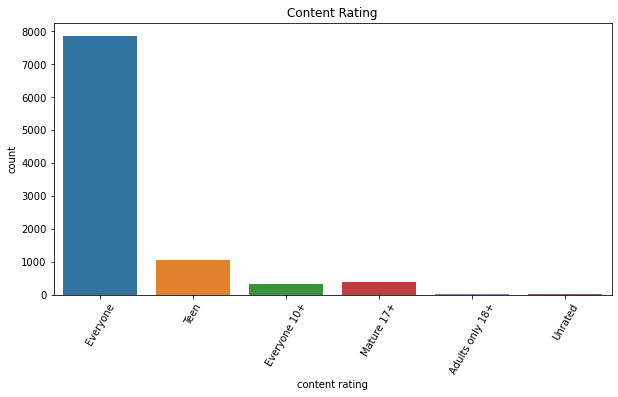

In [627]:
plt.figure(figsize=(10,5))
category_chart = sns.countplot(data=apps_clean, x='content rating')
plt.xticks(rotation=60)
category_chart.set_title('Content Rating')

In [628]:
apps['content rating'].value_counts(normalize=True)

Everyone           0.818219
Teen               0.107246
Mature 17+         0.040683
Everyone 10+       0.033333
Adults only 18+    0.000311
Unrated            0.000207
Name: content rating, dtype: float64

Most of the apps are for everyone

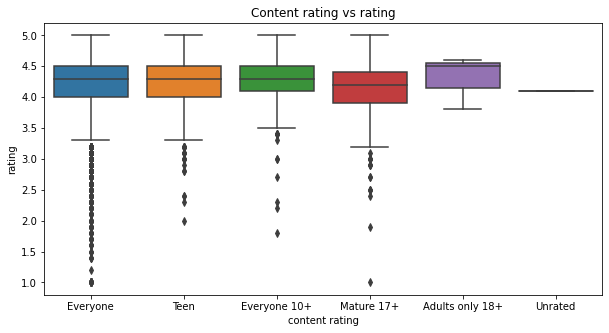

In [629]:
fig, ax = plt.subplots(figsize=(10,5))
ax=sns.boxplot(x='content rating', y='rating', data=apps_clean)
ax.set_title('Content rating vs rating')
plt.show()

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Everyone'),
  Text(1, 0, 'Teen'),
  Text(2, 0, 'Everyone 10+'),
  Text(3, 0, 'Mature 17+'),
  Text(4, 0, 'Adults only 18+'),
  Text(5, 0, 'Unrated')])

<Figure size 720x360 with 0 Axes>

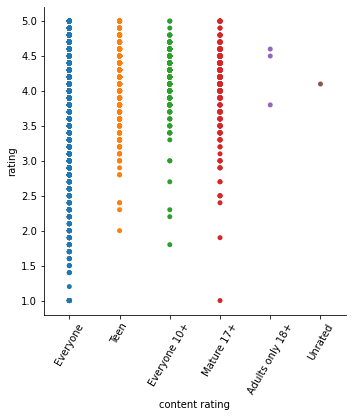

In [630]:
plt.figure(figsize=(10,5))
sns.catplot(x="content rating", y="rating", jitter=False, data=apps_clean)
plt.xticks(rotation=60)

In [631]:
apps_clean.groupby('content rating')['rating'].mean().reset_index()

,content rating,rating
0,Adults only 18+,4.300000
1,Everyone,4.167111
2,Everyone 10+,4.225902
3,Mature 17+,4.119382
4,Teen,4.225796
5,Unrated,4.100000


* 'Adults only 18+' apps are more dense around 4-4.5 rating, whereas other apps have a higher variance, outliers and have at least some apps with rating=5

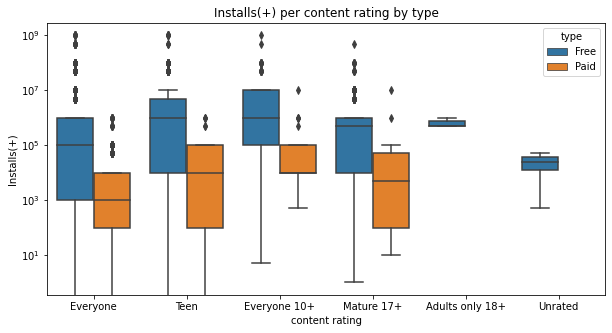

In [632]:
fig, ax = plt.subplots(figsize=(10,5))
ax=sns.boxplot(x='content rating', y='Installs(+)', hue='type', data=apps_clean)
ax.set_title('Installs(+) per content rating by type')
ax.set_yscale('log')
plt.show()

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Everyone'),
  Text(1, 0, 'Teen'),
  Text(2, 0, 'Everyone 10+'),
  Text(3, 0, 'Mature 17+'),
  Text(4, 0, 'Adults only 18+'),
  Text(5, 0, 'Unrated')])

<Figure size 720x360 with 0 Axes>

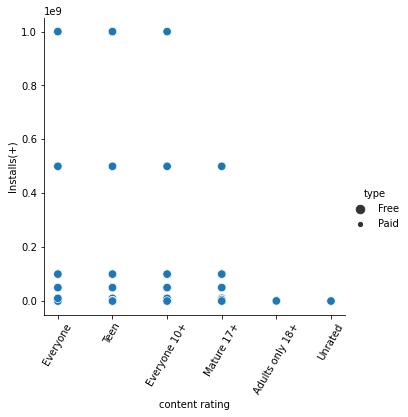

In [633]:
plt.figure(figsize=(10,5))
sns.relplot(x="content rating", y="Installs(+)", size="type", data=apps_clean)
plt.xticks(rotation=60)

In [634]:
apps_clean.groupby(['content rating', 'type'])['Installs(+)'].mean().reset_index()

,content rating,type,Installs(+)
0,Adults only 18+,Free,6.666667e+05
1,Everyone,Free,7.195558e+06
2,Everyone,Paid,4.136988e+04
3,Everyone 10+,Free,1.379920e+07
4,Everyone 10+,Paid,4.678871e+05
5,Mature 17+,Free,6.471105e+06
6,Mature 17+,Paid,6.660300e+05
7,Teen,Free,1.674968e+07
8,Teen,Paid,1.095280e+05
9,Unrated,Free,2.525000e+04


From this plot we can see that free apps have more installs compared to paid apps and that apps for Everyone10+ have more installs.

<a id="1"></a>
# <p style="padding:10px;background-color:#432C0A;margin:0;color:#c69c6c;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Genres</p>

In [635]:
apps_clean['genres'].value_counts()

Tools                              825
Entertainment                      556
Education                          508
Business                           419
Medical                            385
                                  ... 
Art & Design;Pretend Play            1
Lifestyle;Pretend Play               1
Comics;Creativity                    1
Art & Design;Action & Adventure      1
Strategy;Creativity                  1
Name: genres, Length: 118, dtype: int64

It looks like there are some apps with multiple genres as well.

Text(0.5, 1.0, 'Genres')

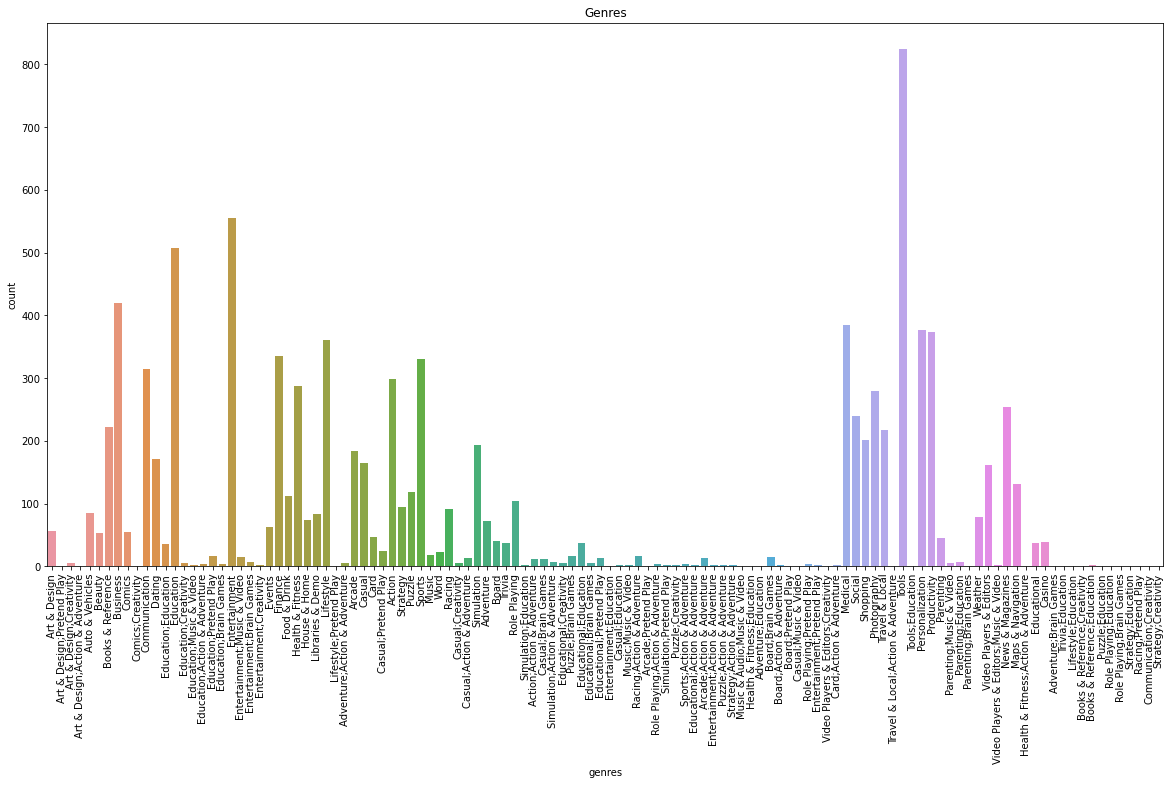

In [636]:
plt.figure(figsize=(20,10))
category_chart = sns.countplot(data=apps_clean, x='genres')
plt.xticks(rotation=90)
category_chart.set_title('Genres')

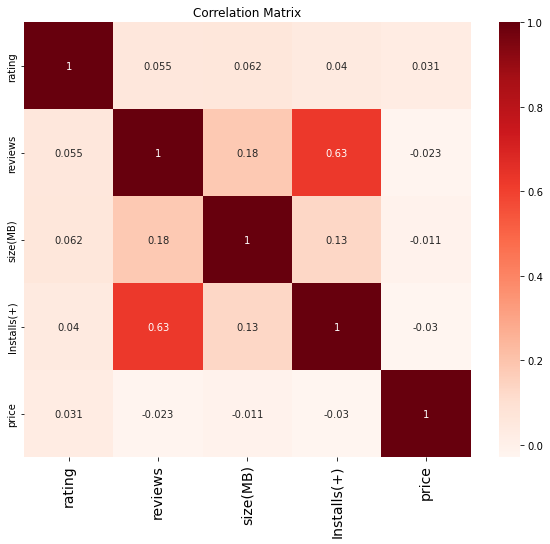

In [637]:
plt.figure(figsize=(10,8))
sns.heatmap(apps_clean.corr(), annot=True, cmap='Reds')
plt.title('Correlation Matrix')
plt.xticks(fontsize=14, rotation=90)
plt.show()

* There is a quite high positive correlation between installs and reviews. This means that apps with higher reviews have more installs.

<a id="1"></a>
# <p style="padding:10px;background-color:#432C0A;margin:0;color:#c69c6c;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Last updated</p>

In [638]:
apps_clean['last updated']=pd.to_datetime(apps_clean['last updated'])

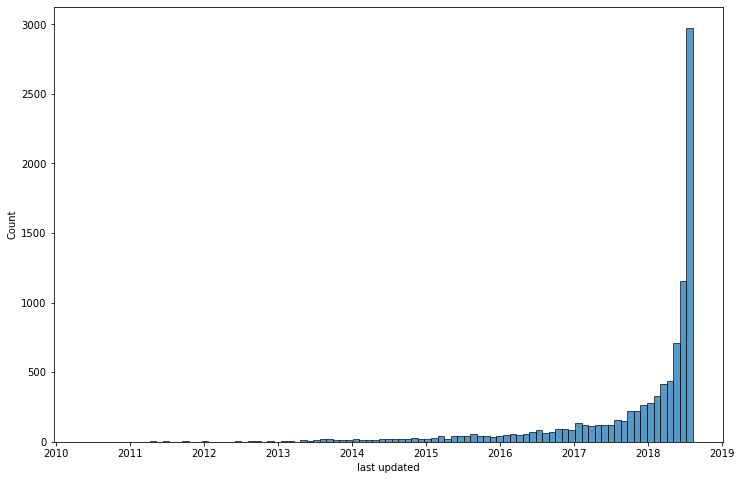

In [639]:
plt.figure(figsize=(12,8))
sns.histplot(x='last updated', data=apps_clean)
plt.show()

* Most apps have been recently updated recently (wrt dataset publication). There are also apps that have been last updated before 2014.<br>

* Moreover, we extract the year from this feature, since it could be interesting to analyze.

In [640]:
apps_clean['last_up_year']=apps_clean['last updated'].dt.year

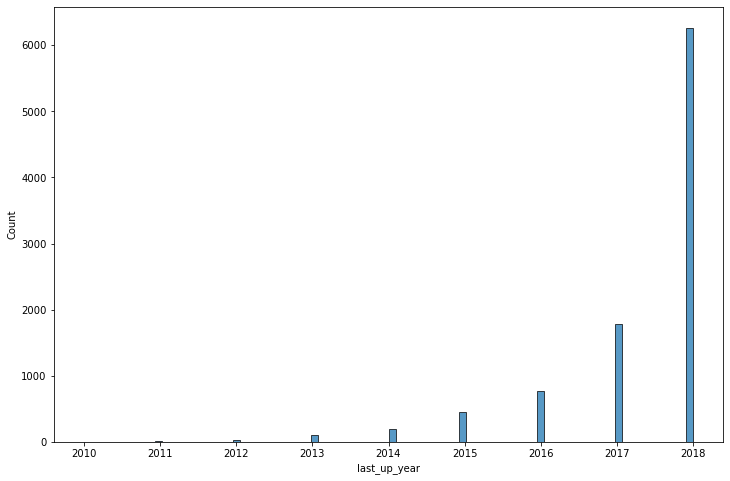

In [641]:
plt.figure(figsize=(12,8))
sns.histplot(x='last_up_year', data=apps_clean)
plt.show()

* We can better visualize the situation here. We can see that the great majority of apps have been updated recently (2018).

<a id="1"></a>
# <p style="padding:10px;background-color:#432C0A;margin:0;color:#c69c6c;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Current version</p>

In [642]:
apps_clean['current ver']

0                    1.0.0
1                    2.0.0
2                    1.2.4
3       Varies with device
4                      1.1
               ...        
9654                  1.48
9655                   1.0
9656                   1.0
9657    Varies with device
9658    Varies with device
Name: current ver, Length: 9620, dtype: object

In [643]:
apps_clean['current ver'] = apps_clean['current ver'].replace('Varies with device', 'NaN', regex=True)

In [644]:
apps_clean['current ver'].value_counts()

NaN           1055
1.0            787
1.1            260
1.2            175
2.0            148
              ... 
4.20.1           1
v150             1
2.5.1.7592       1
2.27.1           1
2.0.148.0        1
Name: current ver, Length: 2810, dtype: int64

* There are a lot of possible current versions among the apps in the store.<br>
To simplify the further analysis, we will approximate the current version with just the first number of the version.

In [645]:
apps_clean['current vers']=apps_clean['current ver'].str.extract(r'^(\d+).', ).astype(float)

In [646]:
apps_clean['current vers'].value_counts()

1.0          4200
2.0          1391
3.0           813
4.0           542
5.0           351
             ... 
100900.0        1
190000.0        1
1805.0          1
263.0           1
2017092.0       1
Name: current vers, Length: 91, dtype: int64

* It looks like some apps have very high numbers as the version first number... this sounds weird, probably the authors did this a joke.

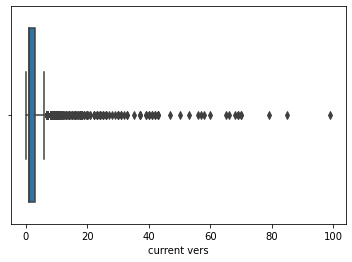

In [647]:
sns.boxplot(x='current vers', data=apps_clean.loc[apps_clean['current vers']<100])
plt.show()

* We can see that by considering only apps with a version number lower than 100, we already have lots of outliers.

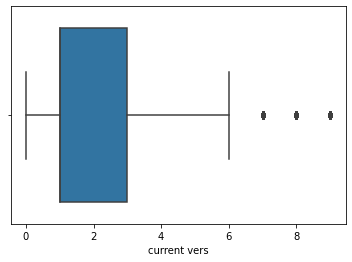

In [648]:
sns.boxplot(x='current vers', data=apps_clean.loc[apps_clean['current vers']<10])
plt.show()

* By considering only apps with version lower than 10 we can start understanding the version feature distribution

In [649]:
print('Total apps', len(apps_clean))
print('Number of apps with current version lower than 1000:', len(apps_clean.loc[apps_clean['current vers']<1000]))
print('Number of apps with current version lower than 100:', len(apps_clean.loc[apps_clean['current vers']<100]))
print('Number of apps with current version lower than 10:', len(apps_clean.loc[apps_clean['current vers']<10]))
print('Number of apps with current version lower than 6:', len(apps_clean.loc[apps_clean['current vers']<6]))

Total apps 9620

Number of apps with current version lower than 1000: 8278

Number of apps with current version lower than 100: 8270

Number of apps with current version lower than 10: 7997

Number of apps with current version lower than 6: 7453


* According to the boxplot, we could consider apps with a version higher than 6 as outliers.

* We drop the categorical 'current ver' column, and we consider only apps with a current version lower than 6.

In [650]:
apps_clean = apps_clean.drop('current ver', axis=1)

In [651]:
apps_clean = apps_clean.loc[apps_clean['current vers']<6]

Text(0.5, 1.0, 'Type')

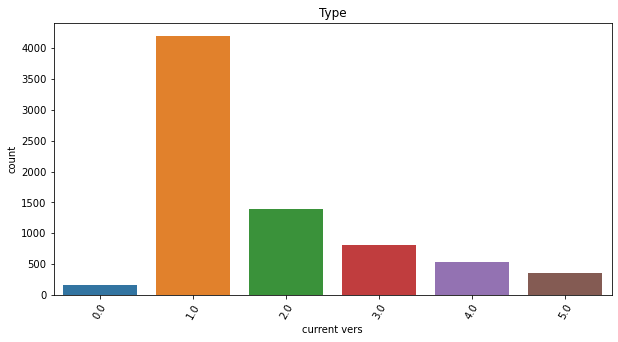

In [652]:
plt.figure(figsize=(10,5))
category_chart = sns.countplot(data=apps_clean, x='current vers')
plt.xticks(rotation=60)
category_chart.set_title('Type')

In [653]:
apps_clean['current vers'].value_counts(normalize=True)* 100

1.0    56.353146
2.0    18.663625
3.0    10.908359
4.0     7.272239
5.0     4.709513
0.0     2.093117
Name: current vers, dtype: float64

<a id="1"></a>
# <p style="padding:10px;background-color:#432C0A;margin:0;color:#c69c6c;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Android version</p>

In [654]:
apps_clean['android ver']

0       4.0.3 and up
1       4.0.3 and up
2       4.0.3 and up
4         4.4 and up
5         2.3 and up
            ...     
9652      4.1 and up
9653      4.0 and up
9654      4.1 and up
9655      4.1 and up
9656      2.2 and up
Name: android ver, Length: 7453, dtype: object

We will remove 'and up' from every rows.

In [655]:
apps_clean['android vers']=apps_clean['android ver'].replace('and up', '', regex=True)

In [656]:
apps_clean.drop('android ver', axis=1,inplace=True)

In [657]:
apps_clean['android vers'].value_counts()

4.1                   1917
4.0.3                 1130
4.0                   1119
4.4                    680
2.3                    567
5.0                    390
4.2                    303
2.3.3                  252
2.2                    218
3.0                    214
4.3                    184
2.1                    125
1.6                     93
6.0                     45
Varies with device      42
7.0                     36
3.2                     31
2.0                     26
5.1                     20
1.5                     18
4.4W                    10
3.1                      9
2.0.1                    7
8.0                      5
7.1                      2
5.0 - 8.0                2
1.0                      2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
5.0 - 7.1.1              1
Name: android vers, dtype: int64

* We can see that we still need to do some cleaning on this column.
In particular we will remove 'varies with device', the 'w' which appears in 4.4w and remove the few data where the android version compatible is within a range such as '5.0 - 7.1.1 '.

In [658]:
apps_clean['android vers']=apps_clean['android vers'].replace('Varies with device', '', regex=True).replace('W', '', regex=True).replace('', np.nan)
apps_clean=apps_clean.loc[apps_clean['android vers'].str.contains(r'-') == False]

In [659]:
apps_clean['android vers']=apps_clean['android vers'].str.strip()

In [660]:
apps_clean['android vers'].value_counts()

4.1      1917
4.0.3    1130
4.0      1119
4.4       690
2.3       567
5.0       390
4.2       303
2.3.3     252
2.2       218
3.0       214
4.3       184
2.1       125
1.6        93
6.0        45
7.0        36
3.2        31
2.0        26
5.1        20
1.5        18
3.1         9
2.0.1       7
8.0         5
7.1         2
1.0         2
Name: android vers, dtype: int64

* We can subsitute subversions such as 4.0.3, 2.3.3 and 2.0.1 with 4.0, 2.3 and 2.0 respecitvely.

In [661]:
apps_clean['android vers'] = apps_clean['android vers'].apply(lambda x: x[:3])

Text(0.5, 1.0, 'Type')

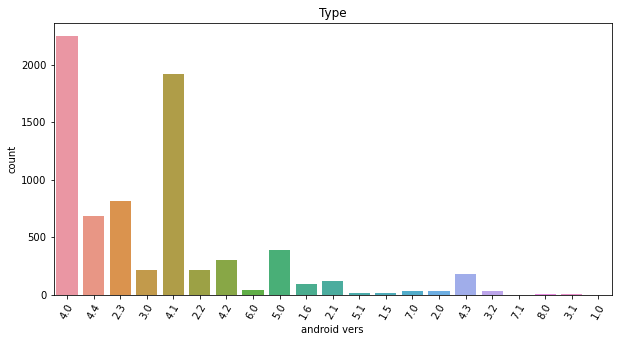

In [662]:
plt.figure(figsize=(10,5))
category_chart = sns.countplot(data=apps_clean, x='android vers')
plt.xticks(rotation=60)
category_chart.set_title('Type')

In [663]:
apps_clean['android vers'].value_counts(normalize=True)* 100

4.0    30.379576
4.1    25.894907
2.3    11.063083
4.4     9.320546
5.0     5.268135
4.2     4.092935
2.2     2.944752
3.0     2.890720
4.3     2.485479
2.1     1.688505
1.6     1.256247
6.0     0.607862
7.0     0.486289
2.0     0.445765
3.2     0.418749
5.1     0.270161
1.5     0.243145
3.1     0.121572
8.0     0.067540
7.1     0.027016
1.0     0.027016
Name: android vers, dtype: float64

* Moreover,can group these android versions by the main number: for example versions 4.0.3 and 4.1 will be labeled as '4' and so on for the different versions

In [664]:
apps_clean['android vers_main'] = apps_clean['android vers'].str.extract(r'^(\d+).', ).astype(float)

In [665]:
apps_clean['android vers_main'].value_counts()

4.0    5343
2.0    1195
5.0     410
3.0     254
1.0     113
6.0      45
7.0      38
8.0       5
Name: android vers_main, dtype: int64

Text(0.5, 1.0, 'Type')

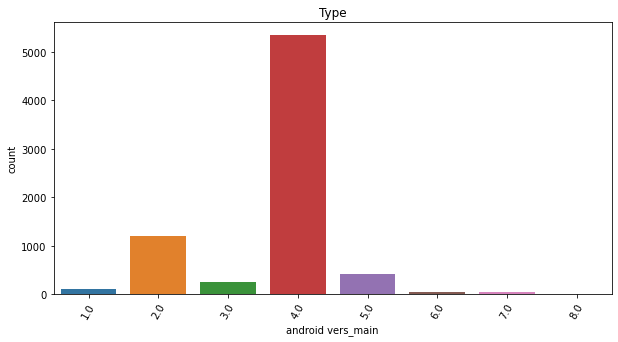

In [666]:
plt.figure(figsize=(10,5))
category_chart = sns.countplot(data=apps_clean, x='android vers_main')
plt.xticks(rotation=60)
category_chart.set_title('Type')

In [667]:
apps_clean['android vers_main'].value_counts(normalize=True)* 100

4.0    72.173443
2.0    16.142105
5.0     5.538295
3.0     3.431041
1.0     1.526408
6.0     0.607862
7.0     0.513305
8.0     0.067540
Name: android vers_main, dtype: float64

In [668]:
apps_clean = apps_clean.loc[(apps_clean['android vers_main'] >= 3)]

In [669]:
apps_clean.info()

<class 'pandas.core.frame.DataFrame'>

Int64Index: 6095 entries, 0 to 9655

Data columns (total 15 columns):

 #   Column             Non-Null Count  Dtype         

---  ------             --------------  -----         

 0   app                6095 non-null   object        

 1   category           6095 non-null   object        

 2   rating             5029 non-null   float64       

 3   reviews            6095 non-null   int64         

 4   size(MB)           5961 non-null   float64       

 5   Installs(+)        6095 non-null   float64       

 6   type               6095 non-null   object        

 7   price              6095 non-null   float64       

 8   content rating     6095 non-null   object        

 9   genres             6095 non-null   object        

 10  last updated       6095 non-null   datetime64[ns]

 11  last_up_year       6095 non-null   int64         

 12  current vers       6095 non-null   float64       

 13  android vers       6095 non-null   object    

We can also change the type of andoid vers to float64:

In [670]:
apps_clean['android vers'] = apps_clean['android vers'].astype(float)

In [671]:
apps_clean['android vers'].info()

<class 'pandas.core.series.Series'>

Int64Index: 6095 entries, 0 to 9655

Series name: android vers

Non-Null Count  Dtype  

--------------  -----  

6095 non-null   float64

dtypes: float64(1)

memory usage: 95.2 KB


* There are some rows with missing values for rating and size. We can impute these quantites by KNNImputer later.

# Relationship

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="padding:10px;background-color:#432C0A;margin:0;color:#c69c6c;font-family:newtimeroman;font-size:130%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Relationship between Price and Rating</p>   

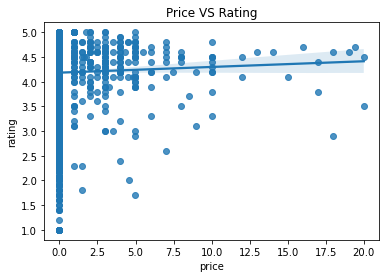

In [672]:
sns.regplot(x='price', y='rating', data=apps_clean)
plt.title('Price VS Rating')
plt.show()

Text(0.5, 1.0, 'Price VS Rating')

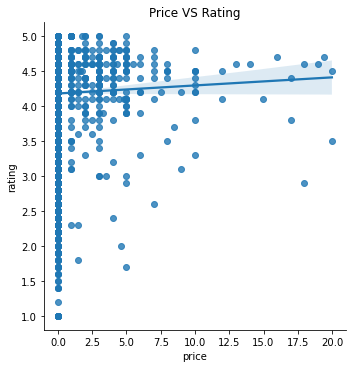

In [673]:
sns.lmplot(x='price', y='rating', data=apps_clean)
plt.title('Price VS Rating')

Text(0.5, 1.0, 'Price VS Rating')

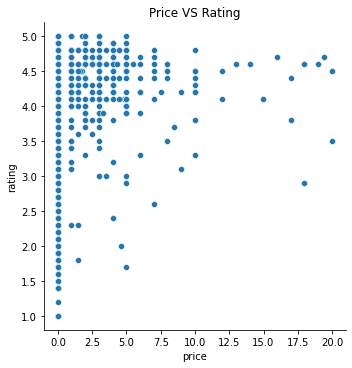

In [674]:
sns.relplot(x="price", y="rating", data=apps_clean)
plt.title('Price VS Rating')

From this plot we can see a slight positive trend between price and rating: apps with higher prices tends to be slightly higher rated.

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="padding:10px;background-color:#432C0A;margin:0;color:#c69c6c;font-family:newtimeroman;font-size:130%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Relationship between Rating and Reviews</p>   

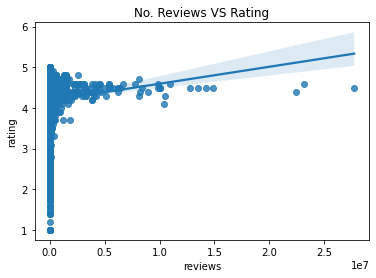

In [675]:
sns.regplot(y='rating', x='reviews', data=apps_clean)
plt.title('No. Reviews VS Rating')
plt.show()

Text(0.5, 1.0, 'Price VS Rating')

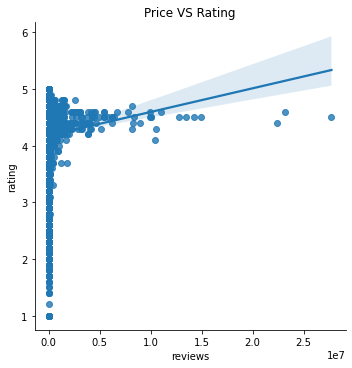

In [676]:
sns.lmplot(x='reviews', y='rating', data=apps_clean)
plt.title('Price VS Rating')

Text(0.5, 1.0, 'Price VS Rating')

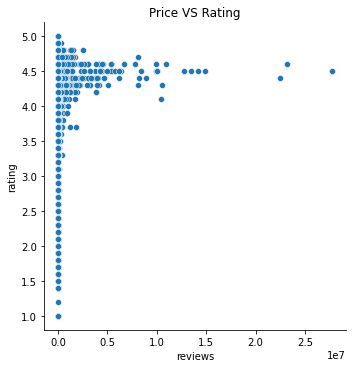

In [677]:
sns.relplot(x="reviews", y="rating", data=apps_clean)
plt.title('Price VS Rating')

We can see a positive trend between rating and number of reviews: apps with more reviews tends to have higher rating.

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="padding:10px;background-color:#432C0A;margin:0;color:#c69c6c;font-family:newtimeroman;font-size:130%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Relationship between Categories and Reviews</p>   

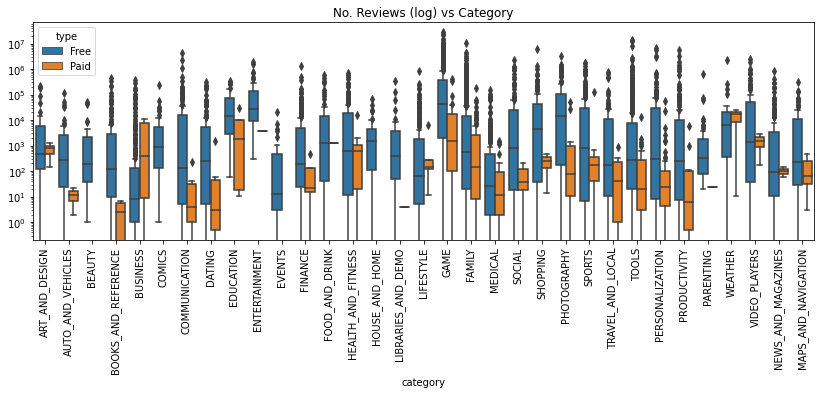

In [678]:
plt.figure(figsize=(14,4))
sns.boxplot(x='category', y='reviews', data=apps_clean, hue='type')
plt.yscale('log')
plt.ylabel('')
plt.xticks(rotation=90);
plt.title('No. Reviews (log) vs Category')
plt.show()

In [679]:
apps_clean.groupby(['category', 'type'])['reviews'].mean().reset_index().sort_values(by='reviews', ascending=False)

,category,type,reviews
25,GAME,Free,802833.328622
16,ENTERTAINMENT,Free,168668.312500
44,PHOTOGRAPHY,Free,160227.506410
42,PERSONALIZATION,Free,142104.288136
58,VIDEO_PLAYERS,Free,132052.188889
...,...,...,...
11,COMMUNICATION,Paid,41.714286
41,PARENTING,Paid,23.000000
3,AUTO_AND_VEHICLES,Paid,11.500000
31,LIBRARIES_AND_DEMO,Paid,4.000000


We can see that apps with the category game, entertainment, education and photography have more reviews than apps of other categories.<br>
In particular, free apps seems to have more reviews than paid apps for most categories, with the exception of business and weather, there paid apps have more reviews overall.

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="padding:10px;background-color:#432C0A;margin:0;color:#c69c6c;font-family:newtimeroman;font-size:130%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Relationship between Categories and Rating</p>   

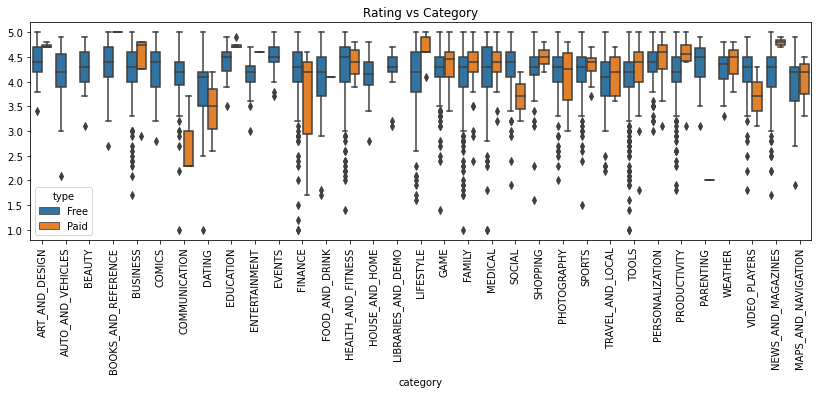

In [680]:
plt.figure(figsize=(14,4))
sns.boxplot(x='category', y='rating', data=apps_clean, hue='type')
plt.xticks(rotation=90);
plt.title('Rating vs Category')
plt.ylabel('')
plt.show()

In [681]:
apps_clean.groupby(['category', 'type'])['rating'].mean().reset_index().sort_values(by='rating', ascending=False)

,category,type,rating
6,BOOKS_AND_REFERENCE,Paid,5.000000
39,NEWS_AND_MAGAZINES,Paid,4.800000
15,EDUCATION,Paid,4.750000
1,ART_AND_DESIGN,Paid,4.733333
33,LIFESTYLE,Paid,4.640000
...,...,...,...
13,DATING,Paid,3.433333
11,COMMUNICATION,Paid,2.766667
41,PARENTING,Paid,2.000000
3,AUTO_AND_VEHICLES,Paid,NaN


From this plot we can see that in most categories, paid apps have higher rating than free apps. In particular it is also interesint to notice that free apps have lots of outlier values compared to paid apps.

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="padding:10px;background-color:#432C0A;margin:0;color:#c69c6c;font-family:newtimeroman;font-size:130%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Relationship between Category and Size</p>   

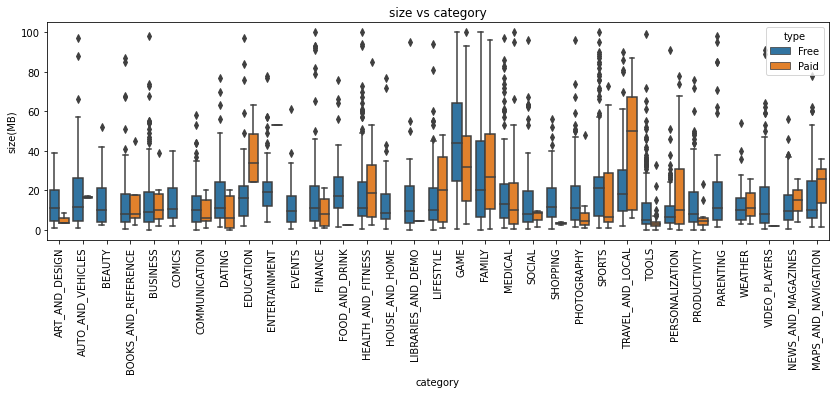

In [682]:
plt.figure(figsize=(14,4))
sns.boxplot(x='category', y='size(MB)', data=apps_clean, hue='type')
plt.xticks(rotation=90);
plt.title('size vs category')
plt.show()

In [683]:
apps_clean.groupby(['category', 'type'])['size(MB)'].mean().reset_index().sort_values(by='size(MB)', ascending=False)

,category,type,size(MB)
17,ENTERTAINMENT,Paid,53.000000
25,GAME,Free,46.250264
57,TRAVEL_AND_LOCAL,Paid,43.011111
15,EDUCATION,Paid,38.750000
26,GAME,Paid,35.791489
...,...,...,...
55,TOOLS,Paid,4.644600
49,SHOPPING,Paid,3.400000
24,FOOD_AND_DRINK,Paid,2.300000
59,VIDEO_PLAYERS,Paid,2.000000


We can see that the category where apps have a higher size are 'game', 'travel and local' (for paid apps only), education (for paid apps only) and family.<br>
In particular, free apps seems to have a higher size compared to paid apps for almost all categories.

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="padding:10px;background-color:#432C0A;margin:0;color:#c69c6c;font-family:newtimeroman;font-size:130%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Relationship between Rating and Size</p>   

<AxesSubplot:xlabel='rating', ylabel='size(MB)'>

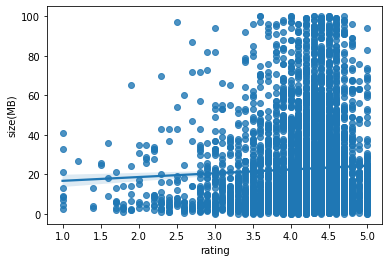

In [684]:
sns.regplot(x='rating', y='size(MB)', data=apps_clean)

Text(0.5, 1.0, 'Price VS Rating')

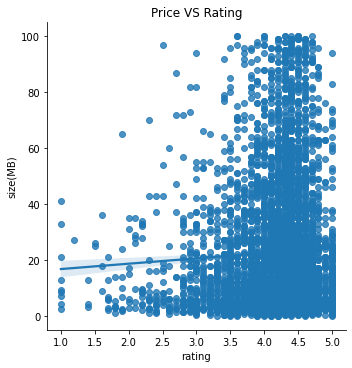

In [685]:
sns.lmplot(x='rating', y='size(MB)', data=apps_clean)
plt.title('Price VS Rating')

Text(0.5, 1.0, 'Price VS Rating')

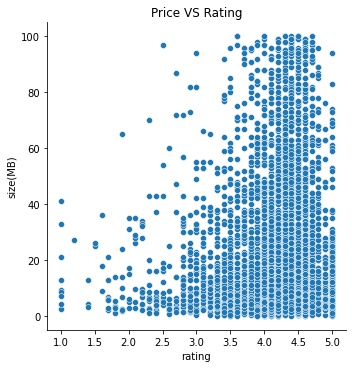

In [686]:
sns.relplot(x="rating", y="size(MB)", data=apps_clean)
plt.title('Price VS Rating')

We can see that apps with higher ratings have more possible sizes compared to apps with lower ratings (<3.0), where the size is almost always under 40 MB. 

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="padding:10px;background-color:#432C0A;margin:0;color:#c69c6c;font-family:newtimeroman;font-size:130%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Relationship between Installs and Reviews</p>   

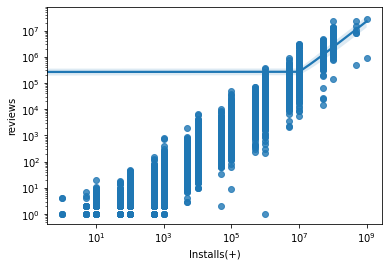

In [687]:
sns.regplot(x='Installs(+)',y='reviews', data=apps_clean)
plt.yscale('log')
plt.xscale('log')

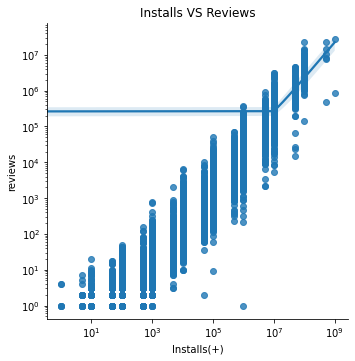

In [688]:
sns.lmplot(x='Installs(+)',y='reviews', data=apps_clean)
plt.title('Installs VS Reviews')
plt.yscale('log')
plt.xscale('log')

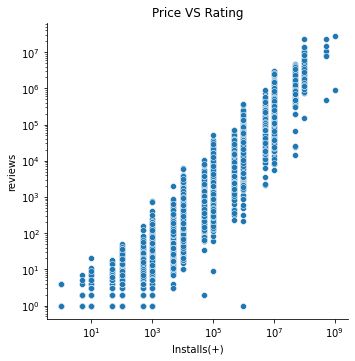

In [689]:
sns.relplot(x='Installs(+)',y='reviews', data=apps_clean)
plt.title('Price VS Rating')
plt.yscale('log')
plt.xscale('log')

From this plot we can see that apps with more installs tends to have more reviews

<a id="1"></a>
# <p style="padding:10px;background-color:#432C0A;margin:0;color:#c69c6c;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">App Rating Prediction</p>

In [312]:
apps_clean.info()

<class 'pandas.core.frame.DataFrame'>

Int64Index: 6095 entries, 0 to 9655

Data columns (total 15 columns):

 #   Column             Non-Null Count  Dtype         

---  ------             --------------  -----         

 0   app                6095 non-null   object        

 1   category           6095 non-null   object        

 2   rating             5029 non-null   float64       

 3   reviews            6095 non-null   int64         

 4   size(MB)           5961 non-null   float64       

 5   Installs(+)        6095 non-null   float64       

 6   type               6095 non-null   object        

 7   price              6095 non-null   float64       

 8   content rating     6095 non-null   object        

 9   genres             6095 non-null   object        

 10  last updated       6095 non-null   datetime64[ns]

 11  last_up_year       6095 non-null   int64         

 12  current vers       6095 non-null   float64       

 13  android vers       6095 non-null   float64   

Text(0.5, 1.0, 'Correlation Matrix')

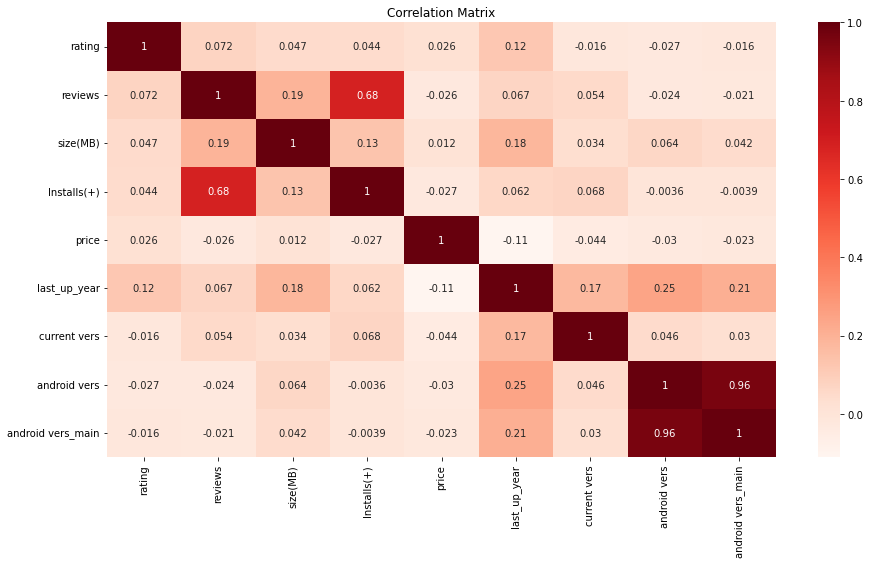

In [317]:
plt.figure(figsize=(15,8))
sns.heatmap(apps_clean.corr(), cmap='Reds', annot=True)
plt.title('Correlation Matrix')

In [363]:
apps1=apps_clean.copy()

In [364]:
apps1=apps1.drop(['app','last updated'], axis=1)

In [365]:
apps1.info()

<class 'pandas.core.frame.DataFrame'>

Int64Index: 6095 entries, 0 to 9655

Data columns (total 13 columns):

 #   Column             Non-Null Count  Dtype  

---  ------             --------------  -----  

 0   category           6095 non-null   object 

 1   rating             5029 non-null   float64

 2   reviews            6095 non-null   int64  

 3   size(MB)           5961 non-null   float64

 4   Installs(+)        6095 non-null   float64

 5   type               6095 non-null   object 

 6   price              6095 non-null   float64

 7   content rating     6095 non-null   object 

 8   genres             6095 non-null   object 

 9   last_up_year       6095 non-null   int64  

 10  current vers       6095 non-null   float64

 11  android vers       6095 non-null   float64

 12  android vers_main  6095 non-null   float64

dtypes: float64(7), int64(2), object(4)

memory usage: 795.7+ KB


In [366]:
apps1.head()

,category,rating,reviews,size(MB),Installs(+),type,price,content rating,genres,last_up_year,current vers,android vers,android vers_main
0,ART_AND_DESIGN,4.1,159,19.0,10000.0,Free,0.0,Everyone,Art & Design,2018,1.0,4.0,4.0
1,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018,2.0,4.0,4.0
2,ART_AND_DESIGN,4.7,87510,8.7,5000000.0,Free,0.0,Everyone,Art & Design,2018,1.0,4.0,4.0
4,ART_AND_DESIGN,4.3,967,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2018,1.0,4.4,4.0
6,ART_AND_DESIGN,3.8,178,19.0,50000.0,Free,0.0,Everyone,Art & Design,2018,1.0,4.0,4.0


To improve the ML algorithm prediction performance, we will log-transform the column 'Installs(+)', in order to make it more 'Normal'.
In particular, we should transform it with log(x+1) transform, since there are apps with 0 installs.

In [367]:
apps1.describe()

,rating,reviews,size(MB),Installs(+),price,last_up_year,current vers,android vers,android vers_main
count,5029.000000,6.095000e+03,5961.000000,6.095000e+03,6095.000000,6095.000000,6095.000000,6095.000000,6095.000000
mean,4.184908,1.286847e+05,21.254512,3.920303e+06,0.239165,2017.538802,1.844791,4.159606,4.062346
std,0.565806,8.832910e+05,22.251823,2.686603e+07,1.299353,0.826872,1.228235,0.454986,0.451506
min,1.000000,0.000000e+00,0.008500,0.000000e+00,0.000000,2012.000000,0.000000,3.000000,3.000000
25%,4.000000,1.400000e+01,5.100000,1.000000e+03,0.000000,2017.000000,1.000000,4.000000,4.000000
50%,4.300000,4.380000e+02,13.000000,5.000000e+04,0.000000,2018.000000,1.000000,4.100000,4.000000
75%,4.500000,1.473150e+04,29.000000,1.000000e+06,0.000000,2018.000000,2.000000,4.200000,4.000000
max,5.000000,2.772226e+07,100.000000,1.000000e+09,19.990000,2018.000000,5.000000,8.000000,8.000000


In [368]:
apps1['Installs(+)']=np.log(apps_clean['Installs(+)'] + 1)

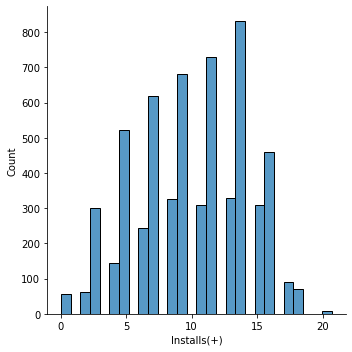

In [369]:
sns.displot(apps1['Installs(+)'])

We can clearly see the benefit of the log transform, now it looks more like a normal distrbution.

Moreover, we can drop the column 'android ver_main' and keep 'android vers' only.

In [370]:
apps1.drop('android vers_main', axis = 1, inplace=True)

<a id="1"></a>
# <p style="padding:10px;background-color:#432C0A;margin:0;color:#c69c6c;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Categorical features Encoding</p>

First, we replace Free and paid with 0 and 1 respecitvely in the price column.

In [371]:
apps1['type'] = apps1['type'].replace({'Free':0, "Paid":1})

In [372]:
apps1.info()

<class 'pandas.core.frame.DataFrame'>

Int64Index: 6095 entries, 0 to 9655

Data columns (total 12 columns):

 #   Column          Non-Null Count  Dtype  

---  ------          --------------  -----  

 0   category        6095 non-null   object 

 1   rating          5029 non-null   float64

 2   reviews         6095 non-null   int64  

 3   size(MB)        5961 non-null   float64

 4   Installs(+)     6095 non-null   float64

 5   type            6095 non-null   int64  

 6   price           6095 non-null   float64

 7   content rating  6095 non-null   object 

 8   genres          6095 non-null   object 

 9   last_up_year    6095 non-null   int64  

 10  current vers    6095 non-null   float64

 11  android vers    6095 non-null   float64

dtypes: float64(6), int64(3), object(3)

memory usage: 748.1+ KB


For what concerns Content Rating and Genres, we will encode them by label encoder, since OHE will create too many columns.

In [373]:
en = LabelEncoder()
catCols =  ['category','content rating','genres']
for cols in catCols:
    apps1[cols] = en.fit_transform(apps1[cols])

In [374]:
apps1.info()

<class 'pandas.core.frame.DataFrame'>

Int64Index: 6095 entries, 0 to 9655

Data columns (total 12 columns):

 #   Column          Non-Null Count  Dtype  

---  ------          --------------  -----  

 0   category        6095 non-null   int32  

 1   rating          5029 non-null   float64

 2   reviews         6095 non-null   int64  

 3   size(MB)        5961 non-null   float64

 4   Installs(+)     6095 non-null   float64

 5   type            6095 non-null   int64  

 6   price           6095 non-null   float64

 7   content rating  6095 non-null   int32  

 8   genres          6095 non-null   int32  

 9   last_up_year    6095 non-null   int64  

 10  current vers    6095 non-null   float64

 11  android vers    6095 non-null   float64

dtypes: float64(6), int32(3), int64(3)

memory usage: 676.6 KB


Finally we can impute the missing values in rating and size by KNNImputer!

In [375]:
imputer = KNNImputer(n_neighbors=3)
apps1 = pd.DataFrame(imputer.fit_transform(apps1),columns = apps1.columns)

In [376]:
apps1.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 6095 entries, 0 to 6094

Data columns (total 12 columns):

 #   Column          Non-Null Count  Dtype  

---  ------          --------------  -----  

 0   category        6095 non-null   float64

 1   rating          6095 non-null   float64

 2   reviews         6095 non-null   float64

 3   size(MB)        6095 non-null   float64

 4   Installs(+)     6095 non-null   float64

 5   type            6095 non-null   float64

 6   price           6095 non-null   float64

 7   content rating  6095 non-null   float64

 8   genres          6095 non-null   float64

 9   last_up_year    6095 non-null   float64

 10  current vers    6095 non-null   float64

 11  android vers    6095 non-null   float64

dtypes: float64(12)

memory usage: 571.5 KB


In [377]:
apps1.head()

,category,rating,reviews,size(MB),Installs(+),type,price,content rating,genres,last_up_year,current vers,android vers
0,0.0,4.1,159.0,19.0,9.210440,0.0,0.0,1.0,9.0,2018.0,1.0,4.0
1,0.0,3.9,967.0,14.0,13.122365,0.0,0.0,1.0,12.0,2018.0,2.0,4.0
2,0.0,4.7,87510.0,8.7,15.424949,0.0,0.0,1.0,9.0,2018.0,1.0,4.0
3,0.0,4.3,967.0,2.8,11.512935,0.0,0.0,1.0,11.0,2018.0,1.0,4.4
4,0.0,3.8,178.0,19.0,10.819798,0.0,0.0,1.0,9.0,2018.0,1.0,4.0


In [378]:
apps1.isnull().sum()

category          0
rating            0
reviews           0
size(MB)          0
Installs(+)       0
type              0
price             0
content rating    0
genres            0
last_up_year      0
current vers      0
android vers      0
dtype: int64

In [486]:
X = apps1.drop('rating', axis = 1).values

In [487]:
y = apps1['rating'].values

In [488]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [489]:
scaler = MinMaxScaler()

In [490]:
scaler.fit(X_train)

MinMaxScaler()

In [491]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)            

<a id="1"></a>
# <p style="padding:10px;background-color:#432C0A;margin:0;color:#c69c6c;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Random Forest Regressor</p>

In [492]:
rf = RandomForestRegressor()

In [493]:
rf.fit(X_train,y_train)

RandomForestRegressor()

In [494]:
y_pred_rf = rf.predict(X_test)

In [495]:
mse_rf = mean_squared_error(y_test, y_pred_rf_test)
print("RMSE using RF_test: ", np.sqrt(mse_rf))

RMSE using RF_test:  0.47534505616855627


In [496]:
feature_name_list=apps1.drop('rating', axis = 1).columns

In [497]:
rf.feature_names = feature_name_list

Text(0.5, 0, 'Feature Importance (%)')

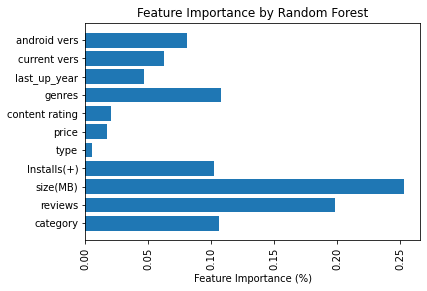

In [498]:
plt.barh(rf.feature_names,rf.feature_importances_)
plt.xticks(rotation=90);
plt.title('Feature Importance by Random Forest')
plt.xlabel('Feature Importance (%)')

<a id="1"></a>
# <p style="padding:10px;background-color:#432C0A;margin:0;color:#c69c6c;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">linear Regression</p>

In [499]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(X_train, y_train)

LinearRegression()

In [500]:
y_pred = mlr.predict(X_test)

In [518]:
mse_lr = metrics.mean_squared_error(y_test, y_pred)
print("RMSE using LR_test: ", np.sqrt(mse_lr))

RMSE using LR_test:  0.5515286244586999


<a id="1"></a>
# <p style="padding:10px;background-color:#432C0A;margin:0;color:#c69c6c;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">XGBoost</p>

In [512]:
xgb = XGBRegressor(n_estimators=2000, learning_rate=0.01)
xgb.fit(X_train, y_train) 
y_pred_xgb = xgb.predict(X_test) 
mse_xgb = mean_squared_error(y_pred_xgb, y_test)

<a id="1"></a>
# <p style="padding:10px;background-color:#432C0A;margin:0;color:#c69c6c;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Rating prediction Summary</p>

In [513]:
xgb.feature_names = feature_name_list

In [520]:
print(r"RMSE with RF: {:.3f}".format(np.sqrt(mse_rf)))
print(r"RMSE withlinear Regression: {:.3f}".format(np.sqrt(mse_lr)))
print(r"RMSE with XGBoost: {:.3f}".format(np.sqrt(mse_xgb)))

RMSE with RF: 0.475

RMSE withlinear Regression: 0.552

RMSE with XGBoost: 0.487


<a id="1"></a>
# <p style="padding:10px;background-color:#432C0A;margin:0;color:#c69c6c;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">RF and XGBoost</p>

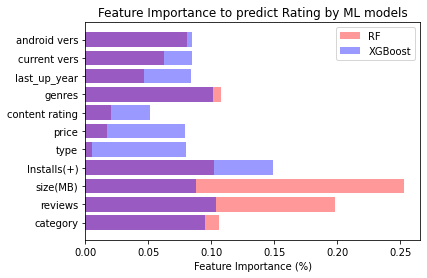

In [521]:
plt.barh(rf.feature_names,rf.feature_importances_, alpha=0.4, label='RF', color='red')
plt.barh(xgb.feature_names,xgb.feature_importances_, alpha=0.4, label='XGBoost', color='blue')
plt.legend(loc='upper right');
plt.title('Feature Importance to predict Rating by ML models')
plt.xlabel('Feature Importance (%)')
plt.show()

We can see that RF and XGBoost gave similar results in terms of RMSE.<br>
For what concerns the Feature importance, we can see that RF gave more importance to reviews and size, while XGBoost spreaded more the feature importance among all the features.

* Reference:
1. https://www.kaggle.com/code/sabasiddiqi/google-play-store-apps-data-cleaning#Current-Version
2. https://www.kaggle.com/code/lava18/all-that-you-need-to-know-about-the-android-market#How-do-the-sizes-of-paid-apps-and-free-apps-vary?
3. https://www.kaggle.com/code/ludovicocuoghi/how-to-predict-app-rating-feature-engineering#Categorical-Features-Cleaning-and-Analysis